<a href="https://colab.research.google.com/github/luca-gecchele/deep-hazel-machine/blob/main/ML4Hazelnuts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning per il riconoscimento di *cultivar* di nocciole

**Candidato**: Luca Gecchele

**Co-relatori**: Prof. Andrea Vandin e Prof. Matteo Dell'Acqua

**Tutor**: Prof. Luca Sebastiani

Questo Notebook è stato creato come supporto visivo per la presentazione in occasione della verifica annuale del percorso formativo.  

## Introduzione e EDA (*Exploratory Data Analysis*)

### Importare le librerie
Per lo studio sono state usate diverse librerie di Python, aperte a tutti. La presenza e la semplicità di utilizzo di tutte queste librerie hanno reso Python uno dei linguaggi di programmazione più popolari e usati al mondo.

In [ ]:
# %pip install numpy
# %pip install pandas
# %pip install matplotlib.pyplot
# %pip install scipy
# %pip install sklearn.impute
# %pip install sklearn.preprocessing

import warnings
warnings.filterwarnings('ignore')

# NumPy è una libreria che fornisce supporto per array e matrici multidimensionali, insieme a una vasta collezione di funzioni matematiche per operare su di essi in modo efficiente. NumPy è alla base di molte altre librerie scientifiche come Pandas, SciPy e scikit-learn.
import numpy as np
# Pandas è una potente libreria Python per la manipolazione e l'analisi dei dati, che offre strutture dati facili da usare e strumenti per gestirle. È essenziale per attività come la pulizia, la preparazione e l'esplorazione dei dati.
import pandas as pd
# Matplotlib è una libreria di visualizzazione grafica per Python, che fornisce strumenti per generare un'ampia gamma di visualizzazioni, come istogrammi, scatter plot, line plot, bar chart, e molto altro.
import matplotlib.pyplot as plt
# SciPy è una libreria per Python che fornisce funzioni e strumenti avanzati per il calcolo scientifico e tecnico, tra cui moduli per l'algebra lineare, l'ottimizzazione, l'integrazione, la statistica e l'elaborazione dei segnali.
from scipy import stats
# Scikit-learn è una libreria di ML che offre strumenti efficienti per supervised e unsupervised learning. Fornisce un'ampia gamma di algoritmi di classificazione, regressione, clustering e riduzione della dimensionalità, oltre a strumenti per la valutazione delle performance.
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, PrecisionRecallDisplay, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Seaborn è una libreria di visualizzazione dei dati progettata per rendere più facile la creazione di grafici statistici complessi e informativi. Fornisce interfacce semplici e predefinite per numerosi tipi di grafici come heatmap, grafici a dispersione e istogrammi.
import seaborn as sns


### Importare il dataset
Dalla mia *repository* su Github carico il dataset, che è stato precedentemente assemblato unendo i dati ottenuti dalle analisi effettuate in laboratorio dal gruppo di ricerca del Professor Matteo Dell'Acqua e i dati ottenuti con metodi di OCR dalle immagini di nocciole rese disponibili.

In [ ]:
# Questo è il link al dataset contenuto nella mia repository di Github. È aperto a tutti.
url = "https://raw.githubusercontent.com/luca-gecchele/deep-hazel-machine/main/presentation_dataset.csv"

# read_csv() è una funzione di Pandas che legge un file CSV come un DataFrame, rendendo facile lavorare con dati in forma tabellare in Python.
# Per saperne di più sui DataFrames: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
data = pd.read_csv(url)

### Exploratory Data Analysis (EDA)
L'EDA (*Exploratory Data Analysis*, in italiano "Analisi Esplorativa dei Dati") è una fase preliminare dell'analisi dei dati che ha come obiettivo principale l'esplorazione, la comprensione e la sintesi delle caratteristiche principali di un dataset. L'EDA viene utilizzata per scoprire schemi, individuare anomalie o scovare relazioni interessanti tra le variabili.

In [ ]:
# La funzione head() in Pandas restituisce le prime righe di un DataFrame. Di default, mostra le prime 5 righe, ma è possibile specificare un numero diverso di righe da visualizzare.
print(data.head())

  tree_code     area_b         area_s     area_u  eccentricity_b  \
0   GE_TR00  104440.00  105940.250000  105062.50        0.490919   
1  GE_TR100  129016.50  127695.250000  137113.75        0.515044   
2   GE_TR46  122803.25  143605.750000  133130.00        0.647493   
3   GE_TR47  130539.75  130407.833333        NaN        0.576543   
4   GE_TR48  118395.75  134419.250000  137593.25        0.574508   

   eccentricity_s  eccentricity_u  ellipse_aspect_ratio_b  \
0        0.379443        0.561262                1.148649   
1        0.561570        0.478333                1.166699   
2        0.377218        0.489589                1.315240   
3        0.409089             NaN                1.224624   
4        0.401341        0.620015                1.224394   

   ellipse_aspect_ratio_s  ellipse_aspect_ratio_u  ...  Hexanol_M  Hexanol_D  \
0                1.086175                1.210636  ...        NaN        NaN   
1                1.223754                1.153898  ...        Na

In [ ]:
# La funzione shape() in Pandas restituisce un tuple che rappresenta le dimensioni del DataFrame, indicando il numero di righe e colonne.
print(data.shape)

(167, 142)


In [ ]:
# La funzione info() in Pandas fornisce un riepilogo conciso del DataFrame, mostrando informazioni come il numero di righe, il tipo di dati di ciascuna colonna, il numero di valori non nulli.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 142 entries, tree_code to Probable.provenance.by.Ferrero
dtypes: float64(140), object(2)
memory usage: 185.4+ KB
None


In [ ]:
# L'istruzione stampa una lista di tutte le colonne presenti nel DataFrame.
print(data.columns.tolist())

['tree_code', 'area_b', 'area_s', 'area_u', 'eccentricity_b', 'eccentricity_s', 'eccentricity_u', 'ellipse_aspect_ratio_b', 'ellipse_aspect_ratio_s', 'ellipse_aspect_ratio_u', 'ellipse_center_0_b', 'ellipse_center_0_s', 'ellipse_center_0_u', 'ellipse_center_1_b', 'ellipse_center_1_s', 'ellipse_center_1_u', 'hu_moment_0_b', 'hu_moment_0_s', 'hu_moment_0_u', 'hu_moment_1_b', 'hu_moment_1_s', 'hu_moment_1_u', 'hu_moment_2_b', 'hu_moment_2_s', 'hu_moment_2_u', 'hu_moment_3_b', 'hu_moment_3_s', 'hu_moment_3_u', 'hu_moment_4_b', 'hu_moment_4_s', 'hu_moment_4_u', 'hu_moment_5_b', 'hu_moment_5_s', 'hu_moment_5_u', 'hu_moment_6_b', 'hu_moment_6_s', 'hu_moment_6_u', 'kurtMaj_b', 'kurtMaj_s', 'kurtMaj_u', 'kurtMin_b', 'kurtMin_s', 'kurtMin_u', 'lenMaj_b', 'lenMaj_s', 'lenMaj_u', 'lenMin_b', 'lenMin_s', 'lenMin_u', 'major_axis_b', 'major_axis_s', 'major_axis_u', 'max_ax_length_b', 'max_ax_length_s', 'max_ax_length_u', 'minor_axis_b', 'minor_axis_s', 'minor_axis_u', 'perimeter_b', 'perimeter_s', 'p

In [ ]:
# L'operazione restituisce le prime cinque righe delle colonne che contengono dati di tipo non numerico (tipo "object").
non_numeric_columns = data.select_dtypes(include=['object']).columns.tolist()
print(data[non_numeric_columns].head())

  tree_code Probable.provenance.by.Ferrero
0   GE_TR00                            NaN
1  GE_TR100                            NaN
2   GE_TR46                        Georgia
3   GE_TR47                        Georgia
4   GE_TR48                     Azerbaijan


Il dataset è composto da 142 colonne (di cui solo due contengono un tipo non numerico), che rappresentano le nostre variabili. Come si può osservare, le prime colonne sembrano essere "triplicate", perché hanno lo stesso nome (ad esempio, ci sono tre colonne contenenti la parola "area"). In realtà, sono state create tre colonne che contengono la media dei valori di tutte le nocciole raccolte da un singolo albero che sono state posizionate con lo stesso orientamento nell'immagine. Le nocciole sono infatti viste dall'alto, dal basso oppure di lato, e si è preferito discriminare questi tre orientamenti per evitare di creare artefatti.

Il dataset è composto altresì da 167 righe, ovvero 167 osservazioni. In questo caso, ciascuna osservazione è un albero, identificato in modo univoco dal valore della colonna `tree_code` (ad esempio, `GE_TR00` indica l'albero coltivato in Georgia numero 00).

Ci sono troppe colonne in questo dataset, quindi elimineremo tutte quelle variabili che non ci interessano, che non forniscono informazioni aggiuntive, o che sono difficili da ottenere. Ricordiamo che il nostro scopo è quello di **identificare le diverse varietà di nocciola sfruttando il minor numero di *features* possibile**.

In [ ]:
# L'operazione rimuove le colonne indicate; `axis=1` specifica che l'operazione deve essere eseguita per le colonne, mentre `inplace=True` specifica che la modifica viene applicata direttamente al DataFrame originale.
data.drop(['Leaf.sequenced', 'Nut.sequenced', 'Nut.presence.in.our.lab', 'Year', 'Nuts.sampled.by.Ferrero', 'Leaves.sampled.by.Ferrero', 'Garden.number', 'Plant.number', 'Duplicates.and.low.quality', 'Nut.weight', 'Nut.roundness.index', 'Shell.thickness.A', 'Kernel.roundness.index', 'Leaf.out.2015', 'Leaf.out.2016', 'Number.of.suckers', 'Vigor', 'Habit', 'Involucre.length.nut.length', 'Nut.cluster', 'Nut.shape', 'Nut.cross.section', 'Nut.shape.apex', 'Nut.apex.prominence', 'Size.pistil.scar', 'Nut.color', 'Size.basal.scar', 'Curvature.basal.scar', 'Nut.stripes', 'Shell.thickness.B.categories', 'Kernel.blanching.categories', 'Paste.protein.percentage', 'Paste.sugar.percentage', 'Paste.fat.percentage', 'Hexanal_D', 'Heptanal_M', 'Heptanal_D', 'Octanal_M', 'Octanal_D', 'Nonanal_M', 'Heptenal_2_M', 'Heptenal_2_D', 'Octenal_2_M', 'Filbertone_M', 'Filbertone_D', 'Benzaldehyde_M', 'furan_2_acetyl_M', 'phenylacetaldehyde_M', 'pyr2M_D', 'pyr25DM_M', 'pyr25DM_D', 'pyr2E_M', 'pyr26DM_M', 'pyr2E36DM_M', 'pyr235TRI_M', 'pyr2E6M_M', 'pyr2E5M_M', 'Pentanol_D', 'Pentanol_T', 'Hexanol_M', 'Hexanol_D', 'Heptanol_M', 'Octanol_M'], axis=1, inplace=True)
# La funzione shape() in Pandas restituisce un tuple che rappresenta le dimensioni del DataFrame, indicando il numero di righe e colonne.
print(data.shape)

(167, 79)


#### Statistica descrittiva
La statistica descrittiva (o *summary statistics*) è un insieme di metodi utilizzati per riassumere e descrivere le caratteristiche principali di un insieme di dati, come la tendenza centrale, la dispersione e la distribuzione. Questi metodi includono misure come la media, la mediana, la moda, la varianza e i percentili.

In [ ]:
# La funzione describe() in Pandas genera un riepilogo delle statistiche descrittive per le colonne numeriche di un DataFrame, come la media, la deviazione standard, i valori minimo e massimo, e i quartili. Può anche essere utilizzata per ottenere statistiche sulle colonne specificandole nell'argomento.

# Restituisce summary statistics dell'intero dataset.
print(data.describe())

# Restituisce summary statistics solo della colonna prescelta (in questo esempio, "area_b").
# print(data['area_b'].describe())

              area_b         area_s         area_u  eccentricity_b  \
count     166.000000     167.000000     165.000000      166.000000   
mean    95843.587349  102225.298653   95206.794697        0.537367   
std     23738.459470   21641.679633   24740.703058        0.078218   
min     45547.500000   51555.500000   48407.000000        0.273061   
25%     79089.562500   86889.812500   77488.000000        0.496299   
50%     91402.000000   96419.625000   89766.750000        0.538127   
75%    109624.687500  116846.000000  111897.000000        0.589125   
max    180945.250000  172126.250000  173408.000000        0.707662   

       eccentricity_s  eccentricity_u  ellipse_aspect_ratio_b  \
count      167.000000      165.000000              166.000000   
mean         0.455055        0.549488                1.200946   
std          0.111517        0.068491                0.071999   
min          0.262644        0.289161                1.043598   
25%          0.380880        0.506499       

Come possiamo osservare, le *features* differiscono molto l'una dall'altra, ad esempio nel valore medio: alcune hanno un ordine di grandezza 5, mentre altre si attestano su un ordine di grandezza 0. Questo lascia intendere che i dati andranno normalizzati prima di addestrare qualsiasi tipo di modello.

#### Analisi delle distribuzioni e gestione degli *outliers*
Studiare la distribuzione di ciascuna variabile permette di identificare la presenza di valori anomali (*outliers*), la simmetria o asimmetria della distribuzione, e la forma generale (come la normalità, la multimodalità, o la presenza di code lunghe). Questo tipo di analisi aiuta a valutare la necessità di trasformazioni successive.

In [ ]:
# L'operazione filtra il DataFrame mantenendo solo le colonne con dati di tipo numerico, escludendo colonne con dati di tipo non numerico (come tree_code).
distribution_data = data.select_dtypes(include='number')

In [ ]:
# La funzione show_histograms() prende come input un dataset e restituisce un istogramma per ciascuna variabile. Il parametro columns_per_row determina il numero di colonne da visualizzare per riga (il valore di default è impostato a 12).
def show_histograms(data, columns_per_row=12):
    # Calcola il numero di righe necessarie
    rows = (data.shape[1] // columns_per_row) + (data.shape[1] % columns_per_row > 0)
    # Crea una figura con la griglia specificata
    fig, axes = plt.subplots(rows, columns_per_row, figsize=(20, rows * 3)) # dimensione della figura (larghezza, altezza)
    # Appiattisci l'array di assi per iterare facilmente su di essi
    axes = axes.flatten()
    # Itera attraverso le colonne del DataFrame e crea il plot
    for i, col in enumerate(data.columns):
        ax = axes[i]
        ax.hist(data[col].dropna(), bins=20, color='skyblue', edgecolor='black') # Istogramma per ciascuna colonna
        ax.set_title(col) # Titolo con il nome della colonna
        ax.set_yticks([]) # Opzionale: Nasconde le etichette sull'asse y per una visualizzazione più pulita
    # Nascondi gli assi vuoti rimanenti se le colonne non sono un multiplo di 12
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

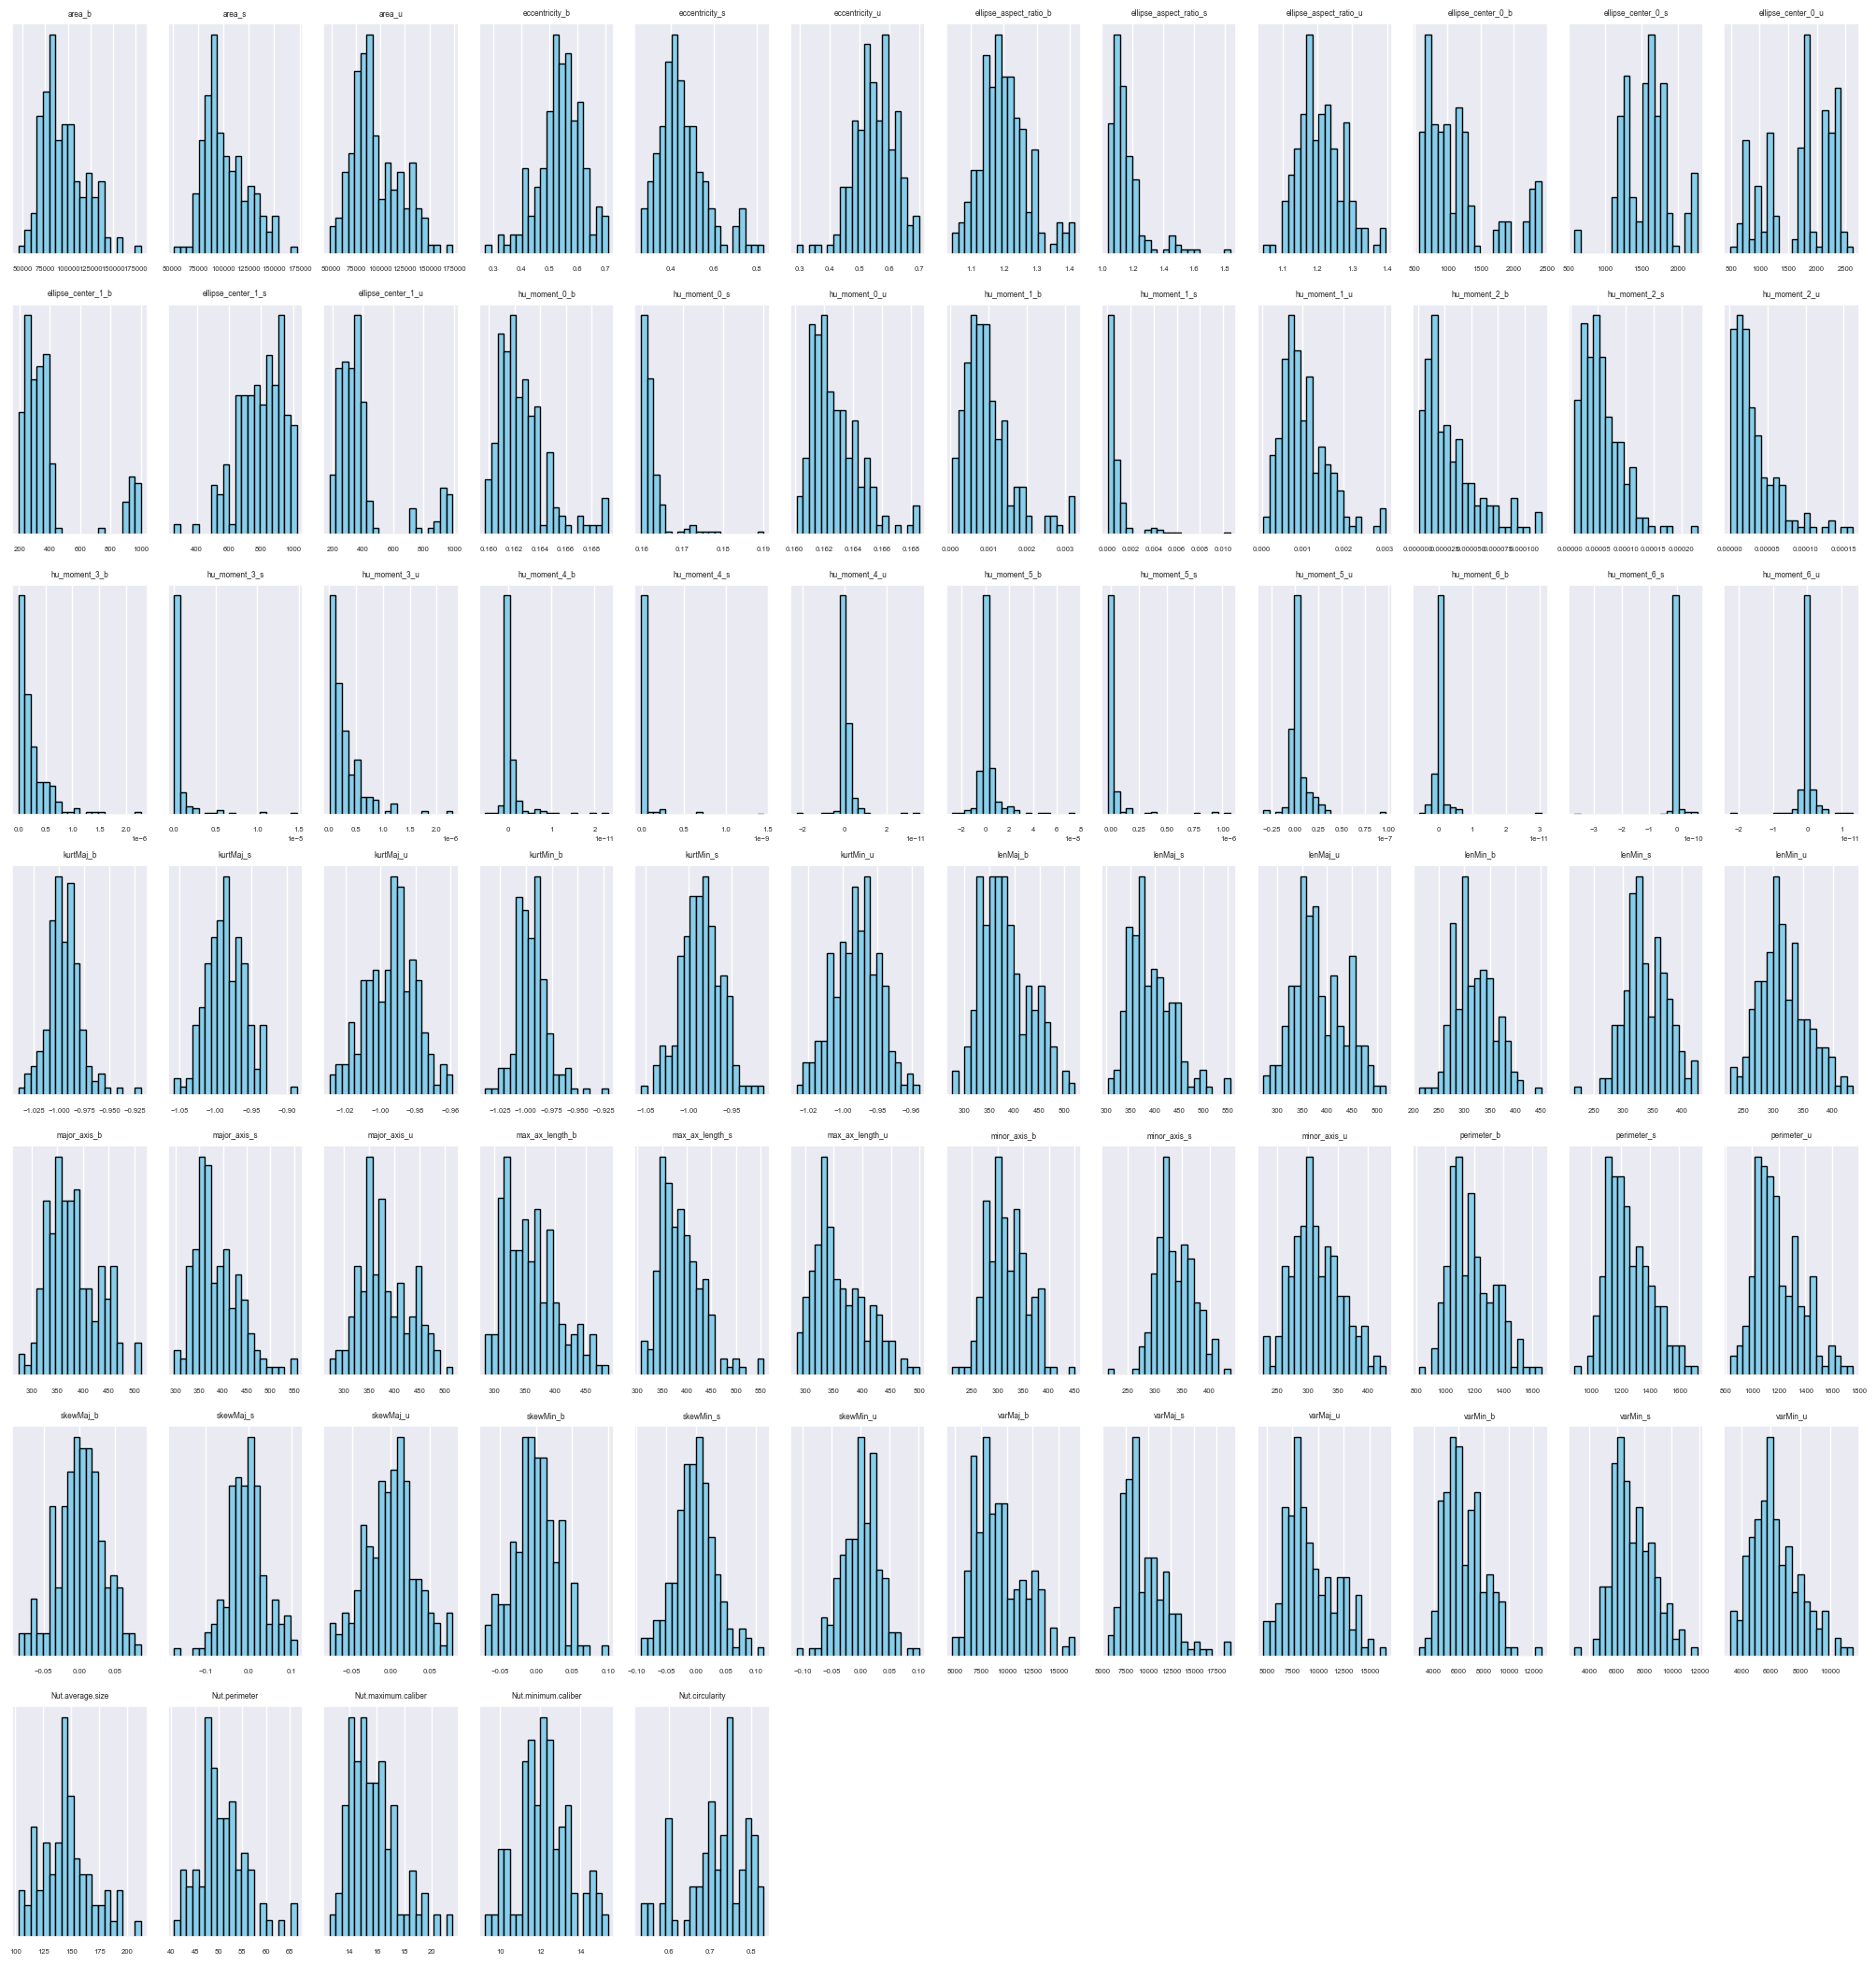

In [ ]:
# Restituisce istogrammi raggruppati su 12 colonne delle distribuzioni delle variabili non modificate.
show_histograms(distribution_data, 12)

Per calcolare gli *outliers* si può utilizzare il metodo IQR o il metodo *z*-score.

Il metodo *z*-Score calcola quanto una osservazione si discosta dalla media in termini di deviazione standard. Un valore assoluto di *z*-Score maggiore di 3 è spesso considerato un *outlier*.
Invece di eliminare le righe contenenti *outliers*, sostituiamo NaN (valore mancante) al posto dei valori che si discostano dalla media per più di tre deviazioni standard.

In [ ]:
# La funzione calculate_zscore() prende come input un dataset (data) e un parametro zscore_threshold (default = 3) che rappresenta la soglia di deviazioni standard oltre la quale un valore è considerato outlier. Restituisce il dataset "filtrato" dagli outlier.
def calculate_zscore(data, zscore_threshold=3):
    # Calcola lo Z-Score per ogni colonna numerica
    z_scores = data.apply(stats.zscore)
    # Identifica i valori che superano la soglia di Z-Score
    outlier_boolean = z_scores.abs() > zscore_threshold
    # Sostituisce i valori outlier con NaN
    data_with_nan = data.mask(outlier_boolean)

    return data_with_nan

In [ ]:
# La funzione missing_values_table() calcola e restituisce una tabella che mostra il numero e la percentuale di valori mancanti per ciascuna colonna di un DataFrame. Inoltre, stampa il numero totale di colonne nel DataFrame e il numero di colonne che contengono valori mancanti, ordinando i risultati in base alla percentuale di valori mancanti in ordine decrescente.
def missing_values_table(data):
    # Calcola il numero di valori mancanti per ciascuna colonna del DataFrame
    mis_val = data.isnull().sum()
    # Calcola la percentuale di valori mancanti rispetto al totale dei valori per ciascuna colonna
    mis_val_percent = 100 * data.isnull().sum() / len(data)
    # Combina i due risultati (valori mancanti e percentuali) in un unico DataFrame con due colonne
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rinomina le colonne del nuovo DataFrame: la prima sarà "Missing Values" e la seconda "% of Total Values"
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    # Filtra le colonne che hanno valori mancanti (percentuale diversa da 0),
    # ordina il risultato per la percentuale di valori mancanti in ordine decrescente,
    # e arrotonda le percentuali a una cifra decimale
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    # Stampa il numero totale di colonne del DataFrame originale e quante di queste hanno valori mancanti
    print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")

    return mis_val_table_ren_columns


In [ ]:
# L'operazione esegue la funzione missing_values_table() sul DataFrame distribution_data per calcolare il numero e la percentuale di valori mancanti in ciascuna colonna.
print(missing_values_table(distribution_data))

Your selected dataframe has 77 columns.
There are 53 columns that have missing values.
                        Missing Values  % of Total Values
Nut.circularity                     88               52.7
Nut.perimeter                       88               52.7
Nut.minimum.caliber                 88               52.7
Nut.average.size                    88               52.7
Nut.maximum.caliber                 88               52.7
max_ax_length_u                      5                3.0
ellipse_aspect_ratio_u               2                1.2
ellipse_center_0_u                   2                1.2
max_ax_length_b                      2                1.2
major_axis_u                         2                1.2
minor_axis_u                         2                1.2
lenMin_u                             2                1.2
lenMaj_u                             2                1.2
perimeter_u                          2                1.2
kurtMin_u                            2     

Notiamo che più del 50% dei valori totali delle prime variabili (come `Nut.circularity` e `Nut.perimeter`) sono mancanti. Più avanti (nella sezione "Come trattare i dati mancanti") spieghiamo come gestire questo tipo di situazioni.

In [ ]:
# L'operazione esegue la funzione calculate_zscore() sul DataFrame precedente per ottenere il nuovo DataFrame libero dagli outlier.
without_outlier_data = calculate_zscore(distribution_data, 3)
# L'operazione esegue la funzione missing_values_table() sul DataFrame without_outlier_data per calcolare il numero e la percentuale di valori mancanti in ciascuna colonna.
print(missing_values_table(without_outlier_data))

Your selected dataframe has 77 columns.
There are 77 columns that have missing values.
                     Missing Values  % of Total Values
Nut.circularity                  88               52.7
Nut.average.size                 88               52.7
Nut.minimum.caliber              88               52.7
Nut.maximum.caliber              88               52.7
Nut.perimeter                    88               52.7
...                             ...                ...
hu_moment_2_b                     1                0.6
hu_moment_1_b                     1                0.6
hu_moment_0_b                     1                0.6
hu_moment_6_b                     1                0.6
area_b                            1                0.6

[77 rows x 2 columns]


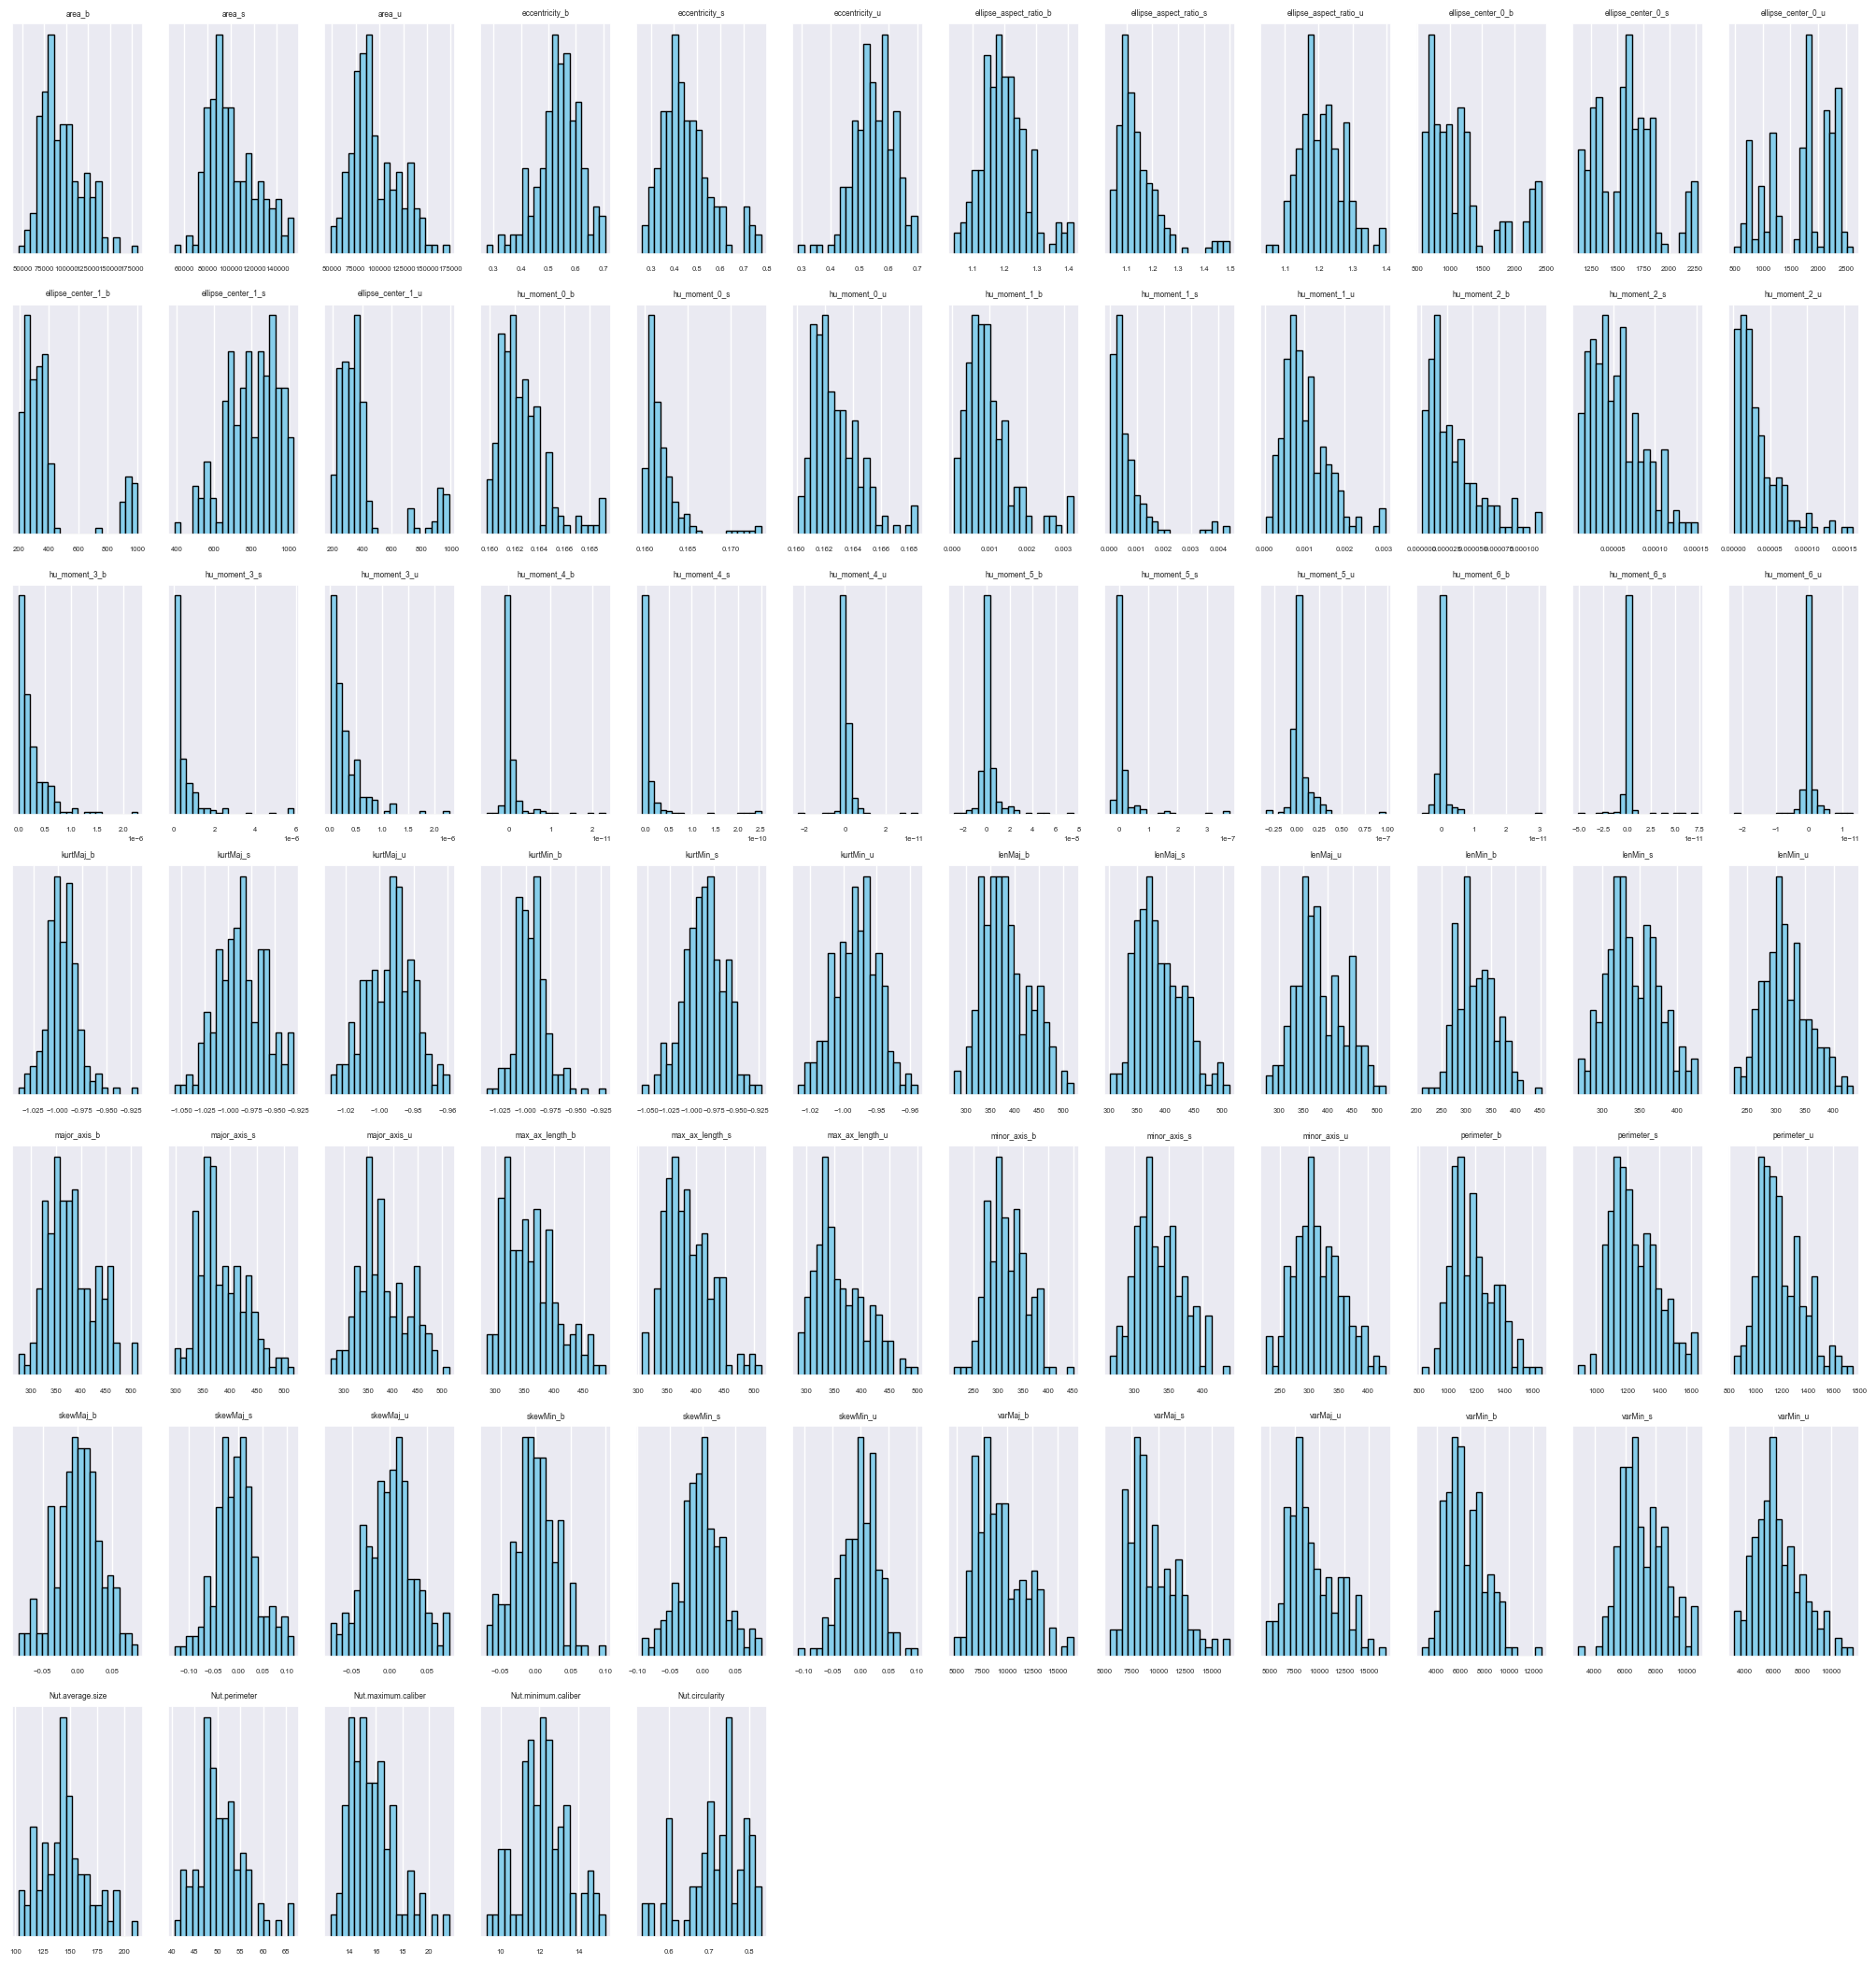

In [ ]:
# Restituisce istogrammi raggruppati su 12 colonne delle distribuzioni delle variabili modificate in seguito a z-score.
show_histograms(without_outlier_data, 12)

Con il metodo *z*-score abbiamo eliminato gli outlier e si può notare come alcune distribuzioni siano più "compatte" e come i valori si distribuiscano più normalmente intorno alla media, rispetto al grafico precedente.

## Preprocessing

### Target Encoding
Prima di modificare ulteriormente il nostro dataset, occorre effettuare un subset del dataset in esame, mantenendo solamente la colonna *target* e una colonna ausiliaria che servirà in seguito a effettuare l'unione dei due subset.

L'*encoding*, nell'ambito del ML, è il processo di trasformazione di variabili categoriche in un formato numerico, poiché molti algoritmi lavorano solo con dati numerici. Effettuiamo un'operazione del genere sulla nostra variabile *target* (ovvero `Probable.provenance.by.Ferrero`) per trasformare in un valore numerico arbitrario la provenienza dall'Asia Minore "estesa" (in questo caso, `0`) e in un altro valore numerico la provenienza dal resto del mondo (in questo caso, `1`). I valori mancanti, invece, rimangono tali.

In [ ]:
# l'operazione effettua un subset del DataFrame originale che contiene solo due colonne prese da "data": "tree_code" e "Probable.provenance.by.Ferrero".
storing_dataset = data[['tree_code', 'Probable.provenance.by.Ferrero']]
# L'operazione modifica i valori della colonna "Probable.provenance.by.Ferrero": se un valore è "Georgia", "Azerbaijan" o "Turkey", viene sostituito con 0. Se il valore è "Unknown", viene sostituito con NaN.
storing_dataset['Probable.provenance.by.Ferrero'] = storing_dataset['Probable.provenance.by.Ferrero'].replace({
    'Georgia': 0,
    'Azerbaijan': 0,
    'Turkey': 0,
    'Unknown': np.nan
})
# Una funzione lambda è applicata alla colonna "Probable.provenance.by.Ferrero": in pratica, questa operazione trasforma tutti i valori non mancanti e diversi da 0 in 1.
# Per saperne di più su apply(): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
# Per saperne di più su lambda functions: https://stackoverflow.com/questions/49069624/understanding-lambda-functions-in-pandas
storing_dataset['Probable.provenance.by.Ferrero'] = storing_dataset['Probable.provenance.by.Ferrero'].apply(
    lambda x: 1 if pd.notna(x) and x != 0 else x
)
# L'operazione permette di visualizzare le prime righe del dataset modificato.
print(storing_dataset['Probable.provenance.by.Ferrero'].value_counts())

Probable.provenance.by.Ferrero
0.0    72
1.0    61
Name: count, dtype: int64


In questo modo è stato ottenuto un DataFrame che sarà possibile in seguito unire al nostro dataset di interesse. Si noti che solo 133 valori (`72` + `61`) sono effettivamente non nulli, contro i 167 totali.

### Come trattare i dati mancanti

Anche se abbiamo rimosso gli *outliers* tramite il metodo *z*-score, è necessario intervenire ancora una volta per gestire la presenza di valori mancanti (in inglese, *Missing Values*), o NA (*Not Available*) o ancora NaN (*Not a Number*). Alcuni sono stati creati per eliminare gli *outliers*, ma la maggior parte è mancante a causa di problemi riscontrati dall'algoritmo stesso nell'elaborazione delle immagini, oppure direttamente a causa della mancanza dell'osservazione di quella data variabile per quella data nocciola.

In [ ]:
# La funzione count() in Pandas calcola il numero di valori non nulli per ogni colonna di un DataFrame o per una Serie specifica. È utile per determinare rapidamente quante osservazioni valide sono presenti in ciascuna colonna, escludendo i valori mancanti.
var = 'Nut.circularity'
print("Il numero di osservazioni non nulle per la variabile {var} è {num}.".format(var=var, num=without_outlier_data[var].count()))

Il numero di osservazioni non nulle per la variabile Nut.circularity è 79.


In [ ]:
# L'operazione rimuove le colonne indicate; `axis=1` specifica che l'operazione deve essere eseguita per le colonne, mentre `inplace=True` specifica che la modifica viene applicata direttamente al DataFrame originale.
without_outlier_data.drop(['Nut.circularity', 'Nut.perimeter', 'Nut.minimum.caliber', 'Nut.average.size', 'Nut.maximum.caliber'], axis=1, inplace=True)
# La funzione shape() in Pandas restituisce un tuple che rappresenta le dimensioni del DataFrame, indicando il numero di righe e colonne.
print(without_outlier_data.shape)

(167, 72)


Per alcune variabili, la soluzione è ovvia: più del 50% delle osservazioni sono mancanti, e un'eventuale imputazione dei valori sarebbe decisamente imprecisa. Dunque, ci limitiamo ad eliminare queste 5 variabili.

Per le altre variabili possiamo invece applicare un processo di sostituzione dei valori mancanti con valori stimati o calcolati in modo da poter continuare l'analisi senza escludere quei dati; questo processo si chiama **imputazione**. L'imputazione è essenziale per evitare la perdita di informazioni preziose o la riduzione della dimensione del dataset.
Esistono diversi metodi per effettuare l'imputazione; tra i metodi più comuni ricordiamo l'imputazione con la media, con la mediana o con la moda, l'imputazione per *forward-fill* o *backward-fill* (ovvero riempire i valori mancanti con il valore precedente o successivo nel dataset - utile soprattutto per serie temporali), l'imputazione con un valore fisso e arbitrario o "sentinella" (che segnala esplicitamente l'assenza di un dato).
Noi applicheremo invece un'imputazione basata su modelli di ML per predire i valori mancanti basandoci sulle altre variabili del dataset.

In [ ]:
# Applicare l'imputazione KNN per sostituire i valori mancanti
# L'operazione inizializza un KNN Imputer, un metodo di imputazione che utilizza l'algoritmo K-Nearest Neighbors (KNN) per riempire i valori mancanti. La tecnica cerca i k vicini più prossimi (nel nostro caso, 5) per ciascun valore mancante, calcolando una media ponderata tra questi vicini per sostituire il valore mancante.
# Per saperne di più su KNN Imputer: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
imputer = KNNImputer(n_neighbors=5)
# L'operazione applica il metodo fit_transform() su without_outlier_data, che contiene valori mancanti (NaN). Questo metodo calcola i vicini più prossimi e poi sostituisce i valori mancanti con le stime calcolate. Il risultato è un array numpy (imputed_data) in cui tutti i valori mancanti sono stati imputati.
imputed_data = imputer.fit_transform(without_outlier_data)
# I dati imputati vengono trasformati in un nuovo DataFrame chiamato imputed_df.
imputed_df = pd.DataFrame(imputed_data, columns=without_outlier_data.columns)
# La funzione missing_values_table() è chiamata per verificare se rimangono valori mancanti nel DataFrame dopo l'imputazione.
print(missing_values_table(imputed_df))

Your selected dataframe has 72 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


### Creazione del dataset finale e altre distribuzioni

In [ ]:
# Il dataset con i valori imputati viene unito alla colonna target tramite join().
final_df = imputed_df.join(storing_dataset)
# La colonna ausiliaria viene eliminata, in quanto non serve più.
final_df = final_df.drop('tree_code', axis=1)
# La colonna target è rinominata.
final_df.rename(columns={'Probable.provenance.by.Ferrero':'target'}, inplace=True)
# Le osservazioni che contengono un NA nella colonna target vengono rimosse.
final_df = final_df[final_df['target'].notna()]

In [ ]:
# Due DataFrame sono creati: uno formato esclusivamente da features e l'altro formato solo dalla colonna target.
df_X = final_df.iloc[:,:-1]
df_y = final_df[['target']]
# Riallinea df_y se necessario
df_y_aligned = df_y.loc[df_X.index]

Adesso che a nostra disposizione c'è un dataset completo di variabile *target*, possiamo visualizzare - tramite l'utilizzo di *violin plot* - come si distribuiscono i dati a seconda di come sono etichettati (`0` oppure `1`, ovvero - di nuovo - Asia Minore estesa oppure Resto del mondo). Possiamo vedere come per la maggior parte delle variabili non cambi come si distribuiscono i suoi dati, mentre ci sono alcune variabili che presentano una distribuzione effettivamente differente a seconda che la nocciola abbia un'ascendenza "asiatica" oppure no.

In [ ]:
# La funzione plot_violin_grid() crea una griglia di violin plot, prendendo come input un dataset e le colonne specificate nell'argomento 'selected_columns' (se non si passa nulla prende come input tutte le colonne). Restituisce il grafico.
def plot_violin_grid(data, target_column='target', selected_columns=None):
    # Rimuovi righe con NaN nella colonna target
    data_clean = data.dropna(subset=[target_column])
    # Converte la colonna target in interi (se non lo è già)
    data_clean[target_column] = data_clean[target_column].astype(int)
    # Se selected_columns è None, usiamo tutte le colonne numeriche tranne la colonna target
    if selected_columns is None:
        selected_columns = data_clean.select_dtypes(include=[np.number]).columns.tolist()
        selected_columns.remove(target_column)
    # Definisci il numero di righe e colonne per la griglia
    n_cols = 4  # Numero di colonne per riga
    n_rows = int(np.ceil(len(selected_columns) / n_cols))  # Numero di righe, in base al numero di colonne selezionate
    # Imposta la figura di matplotlib
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
    # Flatten l'array degli assi per iterazione più semplice
    axes = axes.flatten()
    # Palette di colori personalizzata
    color_target_0 = '#4daf4a'  # Colore per target=0
    color_target_1 = '#377eb8'  # Colore per target=1
    palette = {0: color_target_0, 1: color_target_1}

    # Crea il violin plot per ogni colonna selezionata
    for i, var in enumerate(selected_columns):
        sns.violinplot(x=target_column, y=var, data=data_clean, hue=target_column, ax=axes[i],
                       palette=palette, split=True, inner_kws=dict(box_width=10, whis_width=2))
        axes[i].set_title(var, fontsize=10)
        axes[i].set_xlabel('Target')
        axes[i].set_ylabel(var)

    # Rimuovi gli assi vuoti (se ci sono più assi della quantità di variabili)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    # Aggiungi una legenda personalizzata per i valori del target
    handles = [
        plt.Line2D([0], [0], color=color_target_0, lw=4, label='Asia Minore estesa'),
        plt.Line2D([0], [0], color=color_target_1, lw=4, label='Resto del mondo')
    ]
    # Posiziona la legenda fuori dal grafico
    fig.legend(handles=handles, loc='upper right', fontsize=12)
    # Adatta il layout per prevenire sovrapposizioni
    plt.tight_layout()
    plt.show()

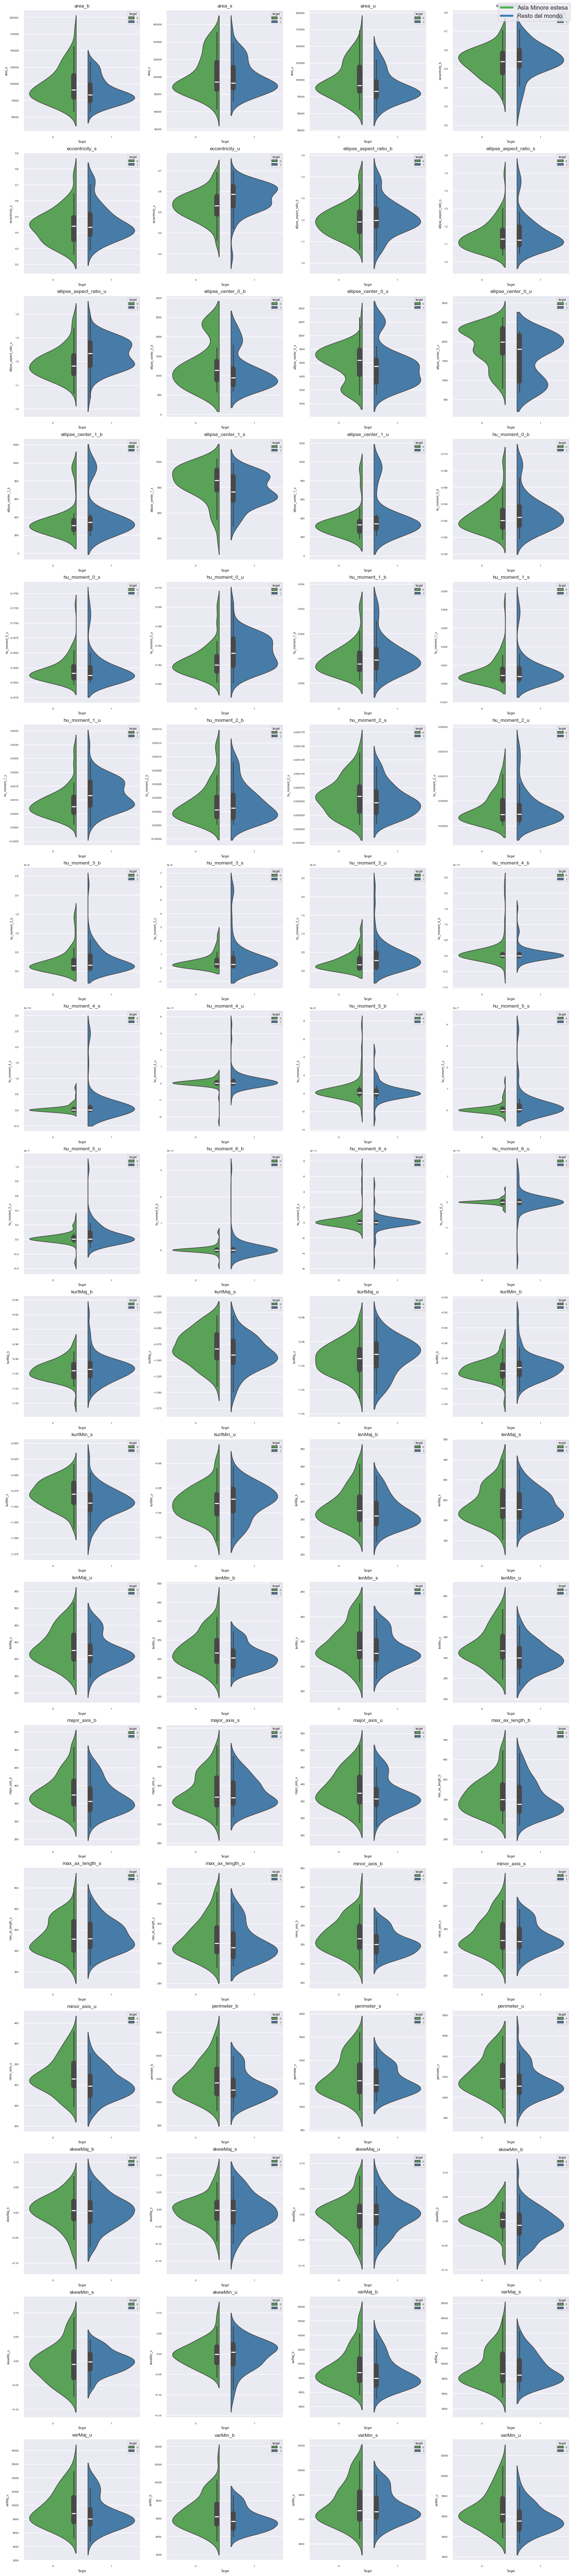

In [ ]:
# Restituisce il grafico con tutte le colonne.
plot_violin_grid(final_df)

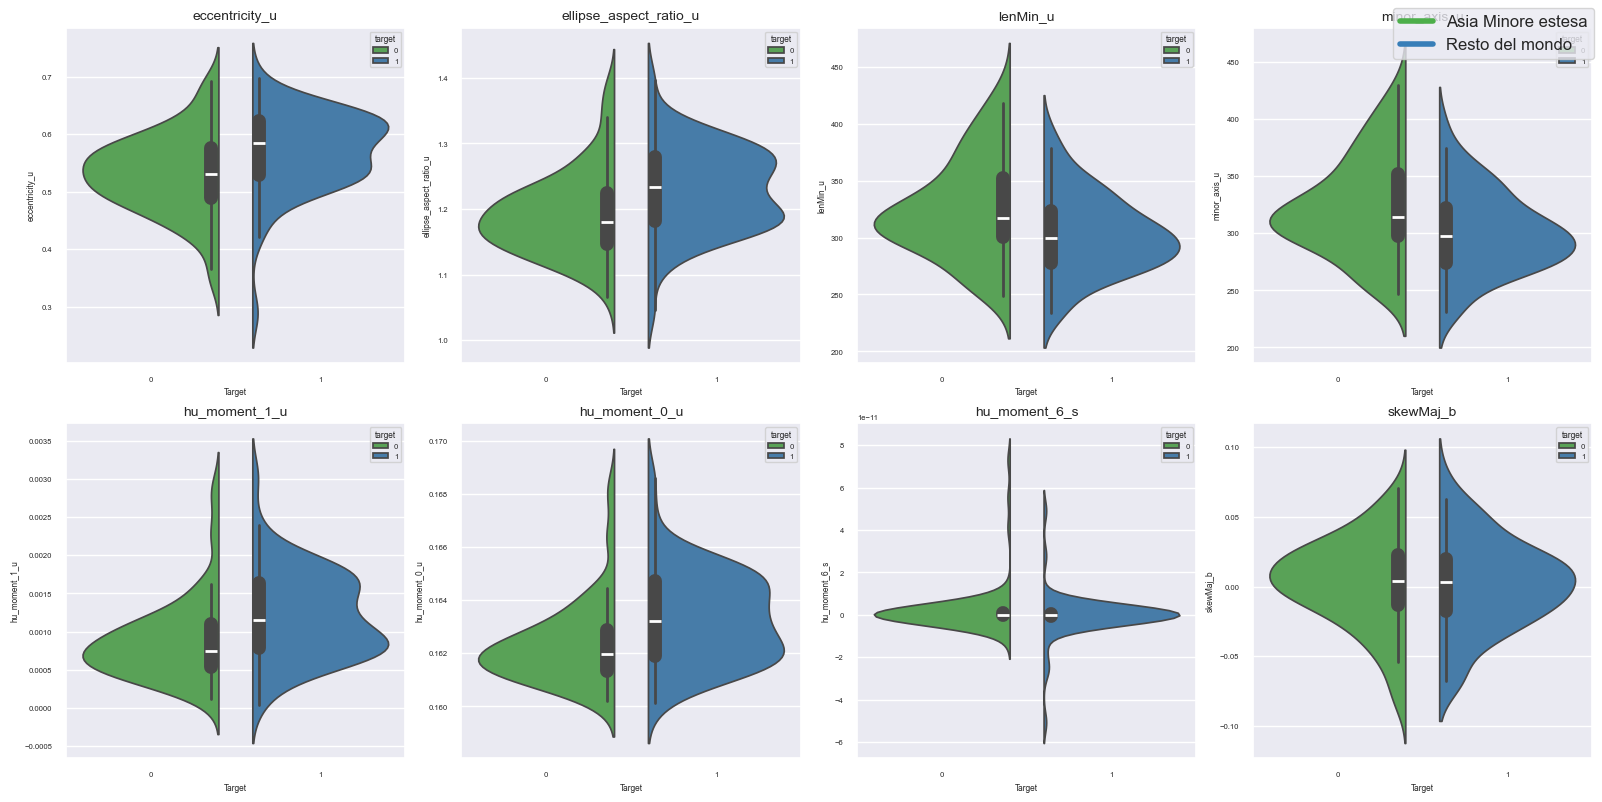

In [ ]:
# Restituisce il grafico con le colonne desiderate.
plot_violin_grid(final_df, selected_columns=['eccentricity_u', 'ellipse_aspect_ratio_u', 'lenMin_u', 'minor_axis_u', 'hu_moment_1_u', 'hu_moment_0_u', 'hu_moment_6_s', 'skewMaj_b'])

Da notare, inoltre, che la maggior parte delle *features* effettivamente significative per la discriminazione tra nocciole sono quelle estratte dalle nocciole viste dall'alto (si possono riconoscere dalla presenza del suffisso `_u`). Questo fatto non era previsto inizialmente, in quanto si riteneva che i dati più rilevanti fossero quelli estratti da nocciole viste dal lato. Non siamo ancora riusciti a darci una spiegazione valida per quanto osservato.

## Analisi della correlazione
Abbiamo numerose variabili nel nostro dataset, alcune molto simili tra loro per loro stessa natura. Il parametro fondamentale che ci permette di capire se due variabili sono legate tra loro da un qualche tipo di relazione è la **correlazione**. Questa è una misura statistica che descrive la relazione lineare tra due variabili, ed assume valori tra -1 (perfettamente correlate negativamente) e 1 (perfettamente correlate positivamente). Una correlazione pari a 0 indica che non esiste correlazione lineare, e quindi le due variabili sono indipendenti l'una dall'altra.

Una *correlation matrix* è una tabella che mostra i coefficienti di correlazione tra diverse variabili, indicando la forza e la direzione delle relazioni tra esse. Un dendrogramma visualizza graficamente le relazioni gerarchiche tra le variabili, raggruppandole in base alla loro somiglianza, facilitando l'interpretazione di *pattern* o *cluster* all'interno dei dati.

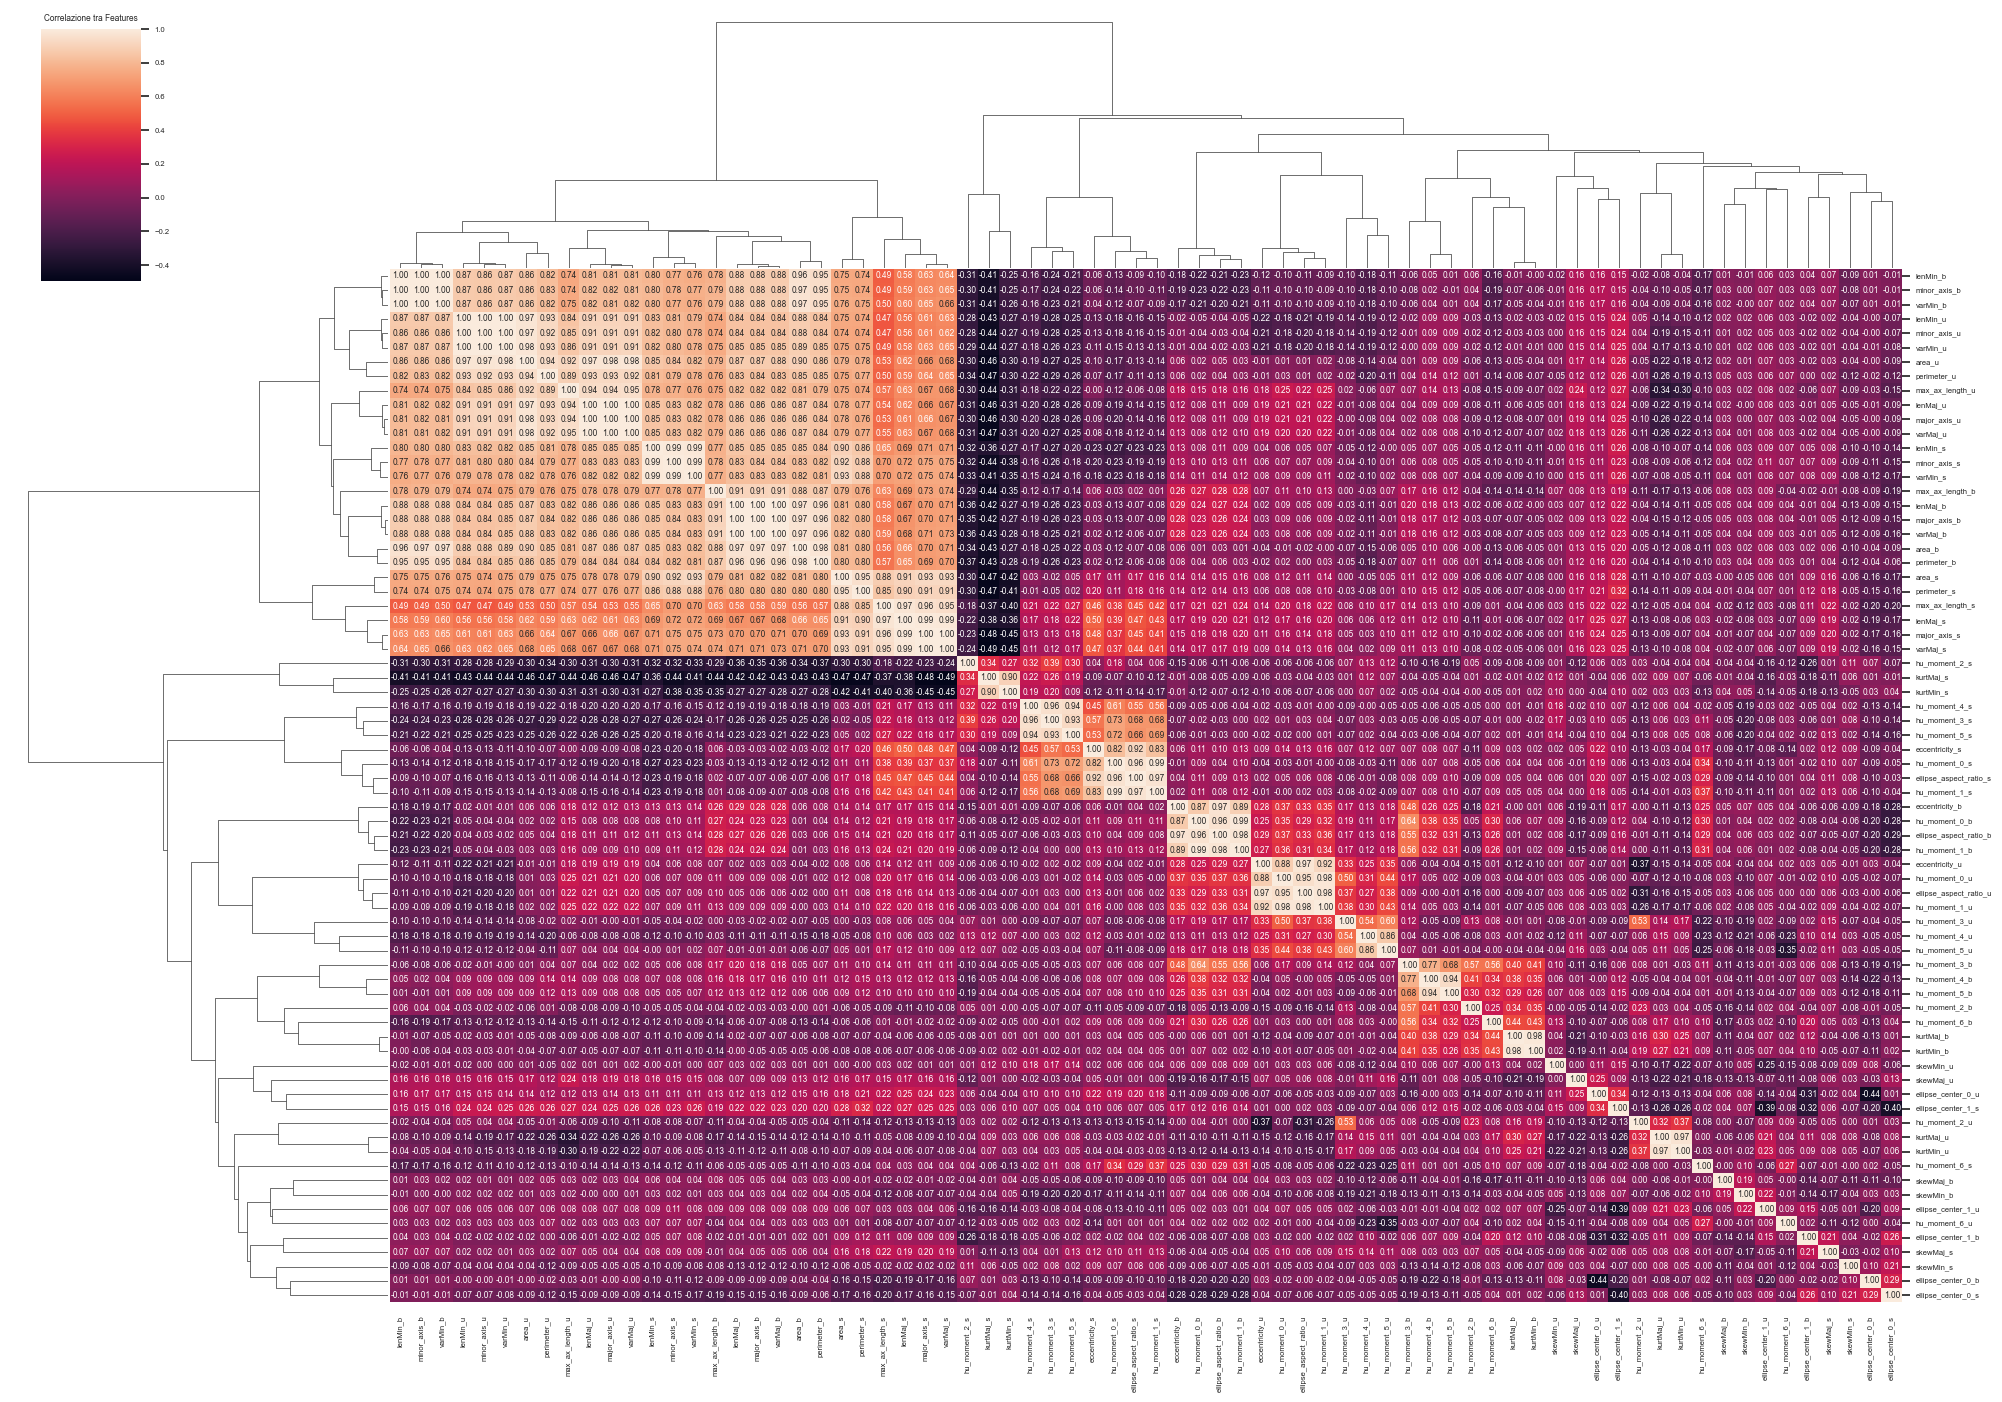

In [ ]:
# Imposta la dimensione del carattere per le etichette nei grafici di Seaborn.
sns.set(font_scale=0.5)
# Calcola la matrice di correlazione tra tutte le variabili nel DataFrame `df_X`.
corr_matrix = df_X.corr()
# Crea una mappa a cluster (clustermap) che visualizza la matrice di correlazione, plottandola come una heatmap clusterizzata gerarchicamente.
sns.clustermap(corr_matrix, annot=True, fmt=".2f", figsize=(20,14))

# Aggiunge un titolo al grafico
plt.title("Correlazione tra Features")
plt.show()

Come si può vedere, esiste un *cluster* in alto a sinistra formato da variabili il cui coefficiente di correlazione è quasi pari a 1 per molte di esse. Questo significa che sono strettamente correlate tra loro, per cui andrebbero eliminate in gran parte, mantenendone solamente una che rappresenti l'intero *cluster*. Le altre variabili, invece, hanno dei valori di coefficiente di correlazione intorno allo 0, per cui si può dire che sono indipendenti o - *almeno* - debolmente correlate.

## Riduzione dimensionale
Ciò che abbiamo visto a partire dall'analisi delle distribuzioni e della correlazione ci porta al prossimo *step*, ovvero la *dimensionality reduction* o **riduzione dimensionale**, processo che determina una riduzione del numero di colonne presenti all'interno del nostro dataset, e quindi una minor complessità computazionale, e anche una maggior interpretabilità del modello creato.

Normalmente, le tecniche di riduzione dimensionale richiedono che i dati siano normalizzati o standardizzati. Per evitare, tuttavia, che la normalizzazione venga effettuata su tutto il dataset, eseguiamo prima la divisione in *training* dataset e in *testing* dataset, in modo che lo standard si basi solo su quella parte dei dati a nostra disposizione.

### Splitting
In quanto scienziati, sarebbe ideale poter disporre di un'enorme quantità di dati per eseguire sia l'addestramento del modello sia la sua validazione. Tuttavia, nella pratica, si dispone raramente di una tale abbondanza di informazioni, rendendo necessario adattarsi alla situazione. Di conseguenza, si adotta comunemente la tecnica della suddivisione del dataset (***splitting***), che prevede la separazione dei dati in due parti non uguali (rispettivamente il 70-80% e il 20-30% delle osservazioni). La porzione maggiore viene utilizzata per l'addestramento del modello, mentre la rimanente è riservata alla valutazione delle sue prestazioni.

In [ ]:
# Controlla se ci sono NaN in df_X e df_y
print(df_X.isnull().sum())  # Controlla eventuali NaN in df_X
print(df_y.isnull().sum())  # Controlla eventuali NaN in df_y

area_b            0
area_s            0
area_u            0
eccentricity_b    0
eccentricity_s    0
                 ..
varMaj_s          0
varMaj_u          0
varMin_b          0
varMin_s          0
varMin_u          0
Length: 72, dtype: int64
target    0
dtype: int64


In [ ]:
# La funzione train_test_split() divide un dataset in due sottogruppi casuali, tipicamente in un set di addestramento (training set) e un set di test (test set). Questo permette di valutare le prestazioni di un modello su dati che non sono stati utilizzati per l'addestramento, evitando il problema di overfitting.
# Che percentuale di dati assegnare al mio training dataset? Per saperne di più: https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=452e6c05d46e061290fefff8b46d0ff161998677
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y_aligned, test_size=0.3, random_state=42)

### Scaling
Quando si hanno a disposizione dati che differiscono di molti ordini di grandezza, è necessario effettuare il cosiddetto *scaling*, ovvero una tecnica che serve a modificare tutti i valori in modo che si attestino tutti sullo stesso ordine di grandezza, ma, al contempo, mantengano la stessa distribuzione.
- La **normalizzazione** trasforma i dati affinché abbiano valori compresi in un determinato intervallo, generalmente tra 0 e 1.
- La **standardizzazione**, invece, ridimensiona i dati affinché questi abbiano una media di 0 e una deviazione standard di 1, mantenendo la distribuzione dei dati.

Nel nostro caso, effettuiamo una standardizzazione tramite la funzione di Scikit-Learn `StandardScaler()`.

In [ ]:
# StandardScaler() standardizza le caratteristiche di un dataset rimuovendo la media e scalando alla varianza unitaria.
scaler = StandardScaler()
# È buona prassi fittare lo scaler solamente sul training dataset ...
scaler.fit(X_train)
# ... per poi applicare lo scaler a entrambi.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Principal Component Analysis (PCA)
In seguito allo *scaling*, abbiamo un dataset pronto per effettuare la riduzione dimensionale tramite Principal Component Analysis, o PCA.

Questa non è l'unica tecnica di riduzione dimensionale, ma la più usata e la più conosciuta. Esistono infatti anche altre tecniche di *feature extraction* (come la tecnica tSNE) e tecniche di *feature selection* (ad esempio, attraverso il test del chi-quadrato), che si distinguono dall'effetto che hanno sulle variabili: mentre *feature selection* si concentra sul selezionare *features* esistenti, *feature extraction* crea nuove variabili trasformando le *features* originali.

La PCA riduce le dimensioni trasformando le caratteristiche originali del dataset in un insieme di nuove variabili, chiamate componenti principali, che sono combinazioni lineari delle caratteristiche originali e non correlate tra loro. Queste componenti vengono ordinate in base alla varianza spiegata, e mantenendo solo le prime componenti che spiegano la maggior parte della varianza, la PCA consente di ridurre il numero di dimensioni pur conservando l'informazione più rilevante.

Per visualizzare quanta percentuale della varianza viene spiegata dalle componenti principali, creiamo un *bar plot* appositamente.

In [ ]:
# PCA() implementa l'analisi delle componenti principali, trasformando le caratteristiche di un dataset in nuove variabili non correlate, ordinandole in base alla varianza.
pca = PCA(n_components=10)
# È buona prassi fittare l'oggetto PCA solamente sul training dataset ...
pca.fit(X_train)
# ... per poi applicare la riduzione dimensionale a entrambi.
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

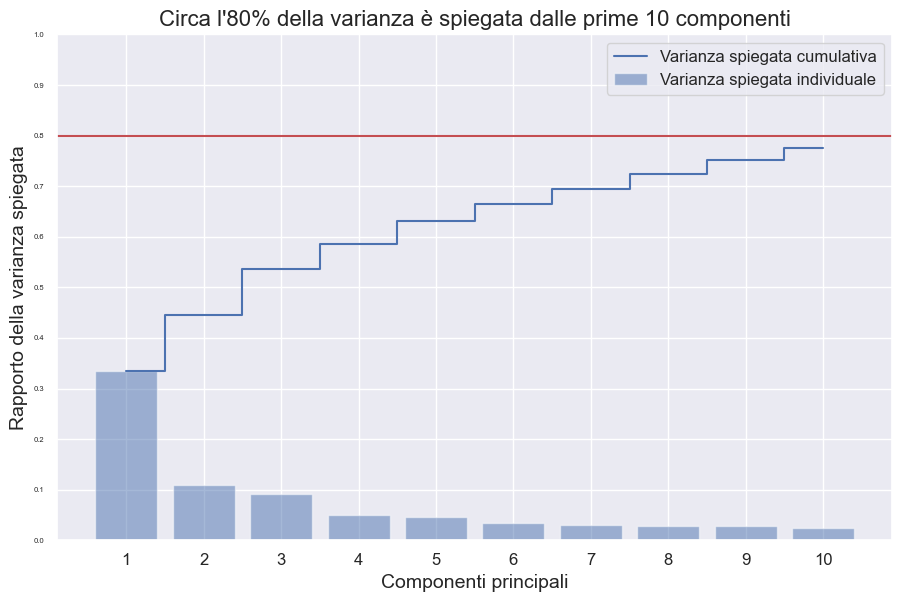

In [ ]:
# Creare la figura con dimensioni personalizzate
plt.figure(1, figsize=(9, 6))
# Grafico a barre della varianza spiegata individuale
plt.bar(range(1, 11, 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Varianza spiegata individuale')
# Step per la varianza spiegata cumulativa
plt.step(range(1, 11, 1), pca.explained_variance_ratio_.cumsum(), where='mid', label='Varianza spiegata cumulativa')

# Etichette degli assi con font più grande
plt.ylabel('Rapporto della varianza spiegata', fontsize=14)
plt.xlabel('Componenti principali', fontsize=14)

# Titolo con font più grande
plt.title("Circa l'80% della varianza è spiegata dalle prime 10 componenti", fontsize=16)

# Aggiungere la legenda con font più grande
plt.legend(loc='best', fontsize=12)

# Aggiungere una linea rossa per l'80% della varianza spiegata
plt.axhline(y=0.8, color='r', linestyle='-')

# Aumentare il numero di ticks sugli assi
plt.xticks(ticks=range(1, 11, 1), fontsize=12)  # Ticks sull'asse X (componenti principali)
plt.yticks(np.arange(0, 1.1, 0.1))  # Ticks da 0 a 1 con intervallo di 0.1

# Usare tight_layout per migliorare la disposizione
plt.tight_layout()

plt.show()


## Addestrare i modelli
Il lavoro di preparazione del dataset è concluso, per cui possiamo finalmente addestrare i nostri modelli di Machine Learning. Abbiamo scelto come nostri modelli un classificatore a vettori di supporto (*Support Vector Classifier* o SVC), un classificatore *Random Forest* e un modello di Regressione logistica, in modo da stabilire quale potesse essere il migliore.

Tuttavia, prima di stabilire quale dei tre è il migliore, bisogna vedere all'interno dello stesso modello qual è il migliore. I modelli di Machine Learning, infatti, si basano su *hyperparameters* che vengono assegnati dall'operatore stesso, e che hanno una diversa incisività sul modello stesso. Per capire, dunque, quale modello sia effettivamente il migliore, possiamo applicare una tecnica chiamata *Grid Search*, che altro non è che lo studio di tutte le possibili combinazioni dei diversi *hyperparameters* e la successiva scelta della combinazione che rende il modello più performante.

In [ ]:
# La funzione perform_grid_search() esegue una GridSearchCV su un modello dato con la griglia di parametri fornita come input. Ritorna il miglior modello con i migliori parametri trovati.
def perform_grid_search(model, param_grid, X_train, y_train, X_test, y_test):
    # Impostare la GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
    # Addestrare il modello con la GridSearch
    grid_search.fit(X_train, y_train)
    # Visualizzare i migliori parametri trovati
    print("Migliori parametri trovati dalla GridSearchCV:")
    print(grid_search.best_params_)
    # Utilizzare il miglior modello trovato per fare previsioni
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    # Mostrare il classification report
    print(classification_report(y_test, y_pred))
    # Mostrare il punteggio di accuratezza sul test set
    print("Accuracy score:", best_model.score(X_test, y_test))

    return best_model

In [ ]:
# La funzione plot_roc_cross_val() calcola e plotta le curve ROC con cross-validation per un dato modello. Ritorna il grafico ROC.
def plot_roc_cross_val(model, X_train, y_train, model_name='Modello'):

    # Se X_train e y_train sono DataFrame, convertirli in array NumPy
    X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
    y_train_np = y_train.values if hasattr(y_train, 'values') else y_train
    # StratifiedKFold per garantire distribuzioni equilibrate
    cv = StratifiedKFold(n_splits=6)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

    # Loop su ogni fold della cross-validation
    for i, (train, test) in enumerate(cv.split(X_train_np, y_train_np)):
        # Addestra il modello su ogni fold
        model.fit(X_train_np[train], y_train_np[train])
        # Calcola le probabilità per le classi positive
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_train_np[test])[:, 1]
        else:
            y_score = model.decision_function(X_train_np[test])
        # Calcola ROC curve e AUC
        fpr, tpr, _ = roc_curve(y_train_np[test], y_score)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label=f'Fold {i} (AUC = {roc_auc:.2f})')
        # Interpola i veri positivi
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

    # Calcola la media e la deviazione standard delle curve ROC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    ax.plot(mean_fpr, mean_tpr, color='b', label=f'ROC media (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2, alpha=.8)

    # Plot della curva di casualità
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8, label='Scelta casuale (AUC = 0.5)')
    # Riempire la deviazione standard
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'± 1 dev. std.')

    # Aggiungere etichette e legenda con font più grandi
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title=f"Curva ROC con incertezza - {model_name}")
    ax.set_title(f"Curva ROC con incertezza - {model_name}", fontsize=18)  # Ingrandire il titolo
    ax.set_xlabel('FPR - Tasso di Falsi positivi', fontsize=14)  # Ingrandire etichetta asse X
    ax.set_ylabel('TPR - Tasso di Veri positivi', fontsize=14)  # Ingrandire etichetta asse Y

    # Ingrandire la legenda
    ax.legend(loc="lower right", fontsize=12)

    # Ingrandire i ticks degli assi
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xticks(np.arange(0, 1.1, 0.1))  # Ticks da 0 a 1 con intervallo di 0.1
    ax.set_yticks(np.arange(0, 1.1, 0.1))  # Ticks da 0 a 1 con intervallo di 0.1

    plt.show()

### Support Vector Classifier (SVC)
Il *Support Vector Classifier* (SVC) è un algoritmo di *supervised ML* utilizzato per la classificazione. Il suo obiettivo è trovare una linea (o un iperpiano) che separi i dati di diverse classi con il margine più ampio possibile. SVC utilizza i *support vectors*, che sono i punti dati più vicini alla linea di separazione, per determinare questo iperpiano ottimale. Può gestire sia problemi di classificazione lineari che non lineari, grazie all'uso di *kernel* che trasformano i dati in uno spazio di dimensioni superiori per rendere le classi separabili.

In [ ]:
# Definire il modello
model_svc = SVC(random_state=42, probability=True)

# Definire la griglia di parametri
param_grid_svc = {
    'C': [0.01, 0.1, 1, 10, 100], # Parametro di regolarizzazione: controlla la penalizzazione per errori di classificazione; un valore più basso aumenta la regolarizzazione (maggior tolleranza agli errori).
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], # Tipo di funzione kernel usata per trasformare i dati.
    'degree': [2, 3, 4], # Grado del polinomio usato per il kernel 'poly' (ignorato per gli altri kernel).
    'gamma': ['scale', 'auto'], # Parametro per il kernel 'rbf', 'poly' e 'sigmoid', controlla l'influenza di un singolo campione.
    'max_iter': [1000, 2000, 5000] # Numero massimo di iterazioni per l'algoritmo di ottimizzazione (quanto a lungo il modello tenta di trovare la soluzione).
}

# Eseguire la ricerca a griglia e addestrare il modello
best_model_svc = perform_grid_search(model_svc, param_grid_svc, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Migliori parametri trovati dalla GridSearchCV:
{'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': 2000}
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83        22
         1.0       0.81      0.72      0.76        18

    accuracy                           0.80        40
   macro avg       0.80      0.79      0.80        40
weighted avg       0.80      0.80      0.80        40

Accuracy score: 0.8


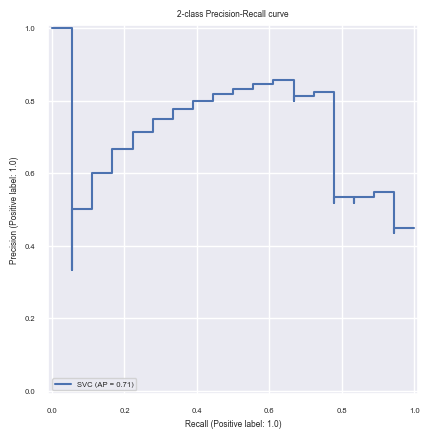

In [ ]:
# Mostra la curva Precision-Recall per SVC
display = PrecisionRecallDisplay.from_estimator(best_model_svc, X_test, y_test, name="SVC", plot_chance_level=False)
_ = display.ax_.set_title("2-class Precision-Recall curve")

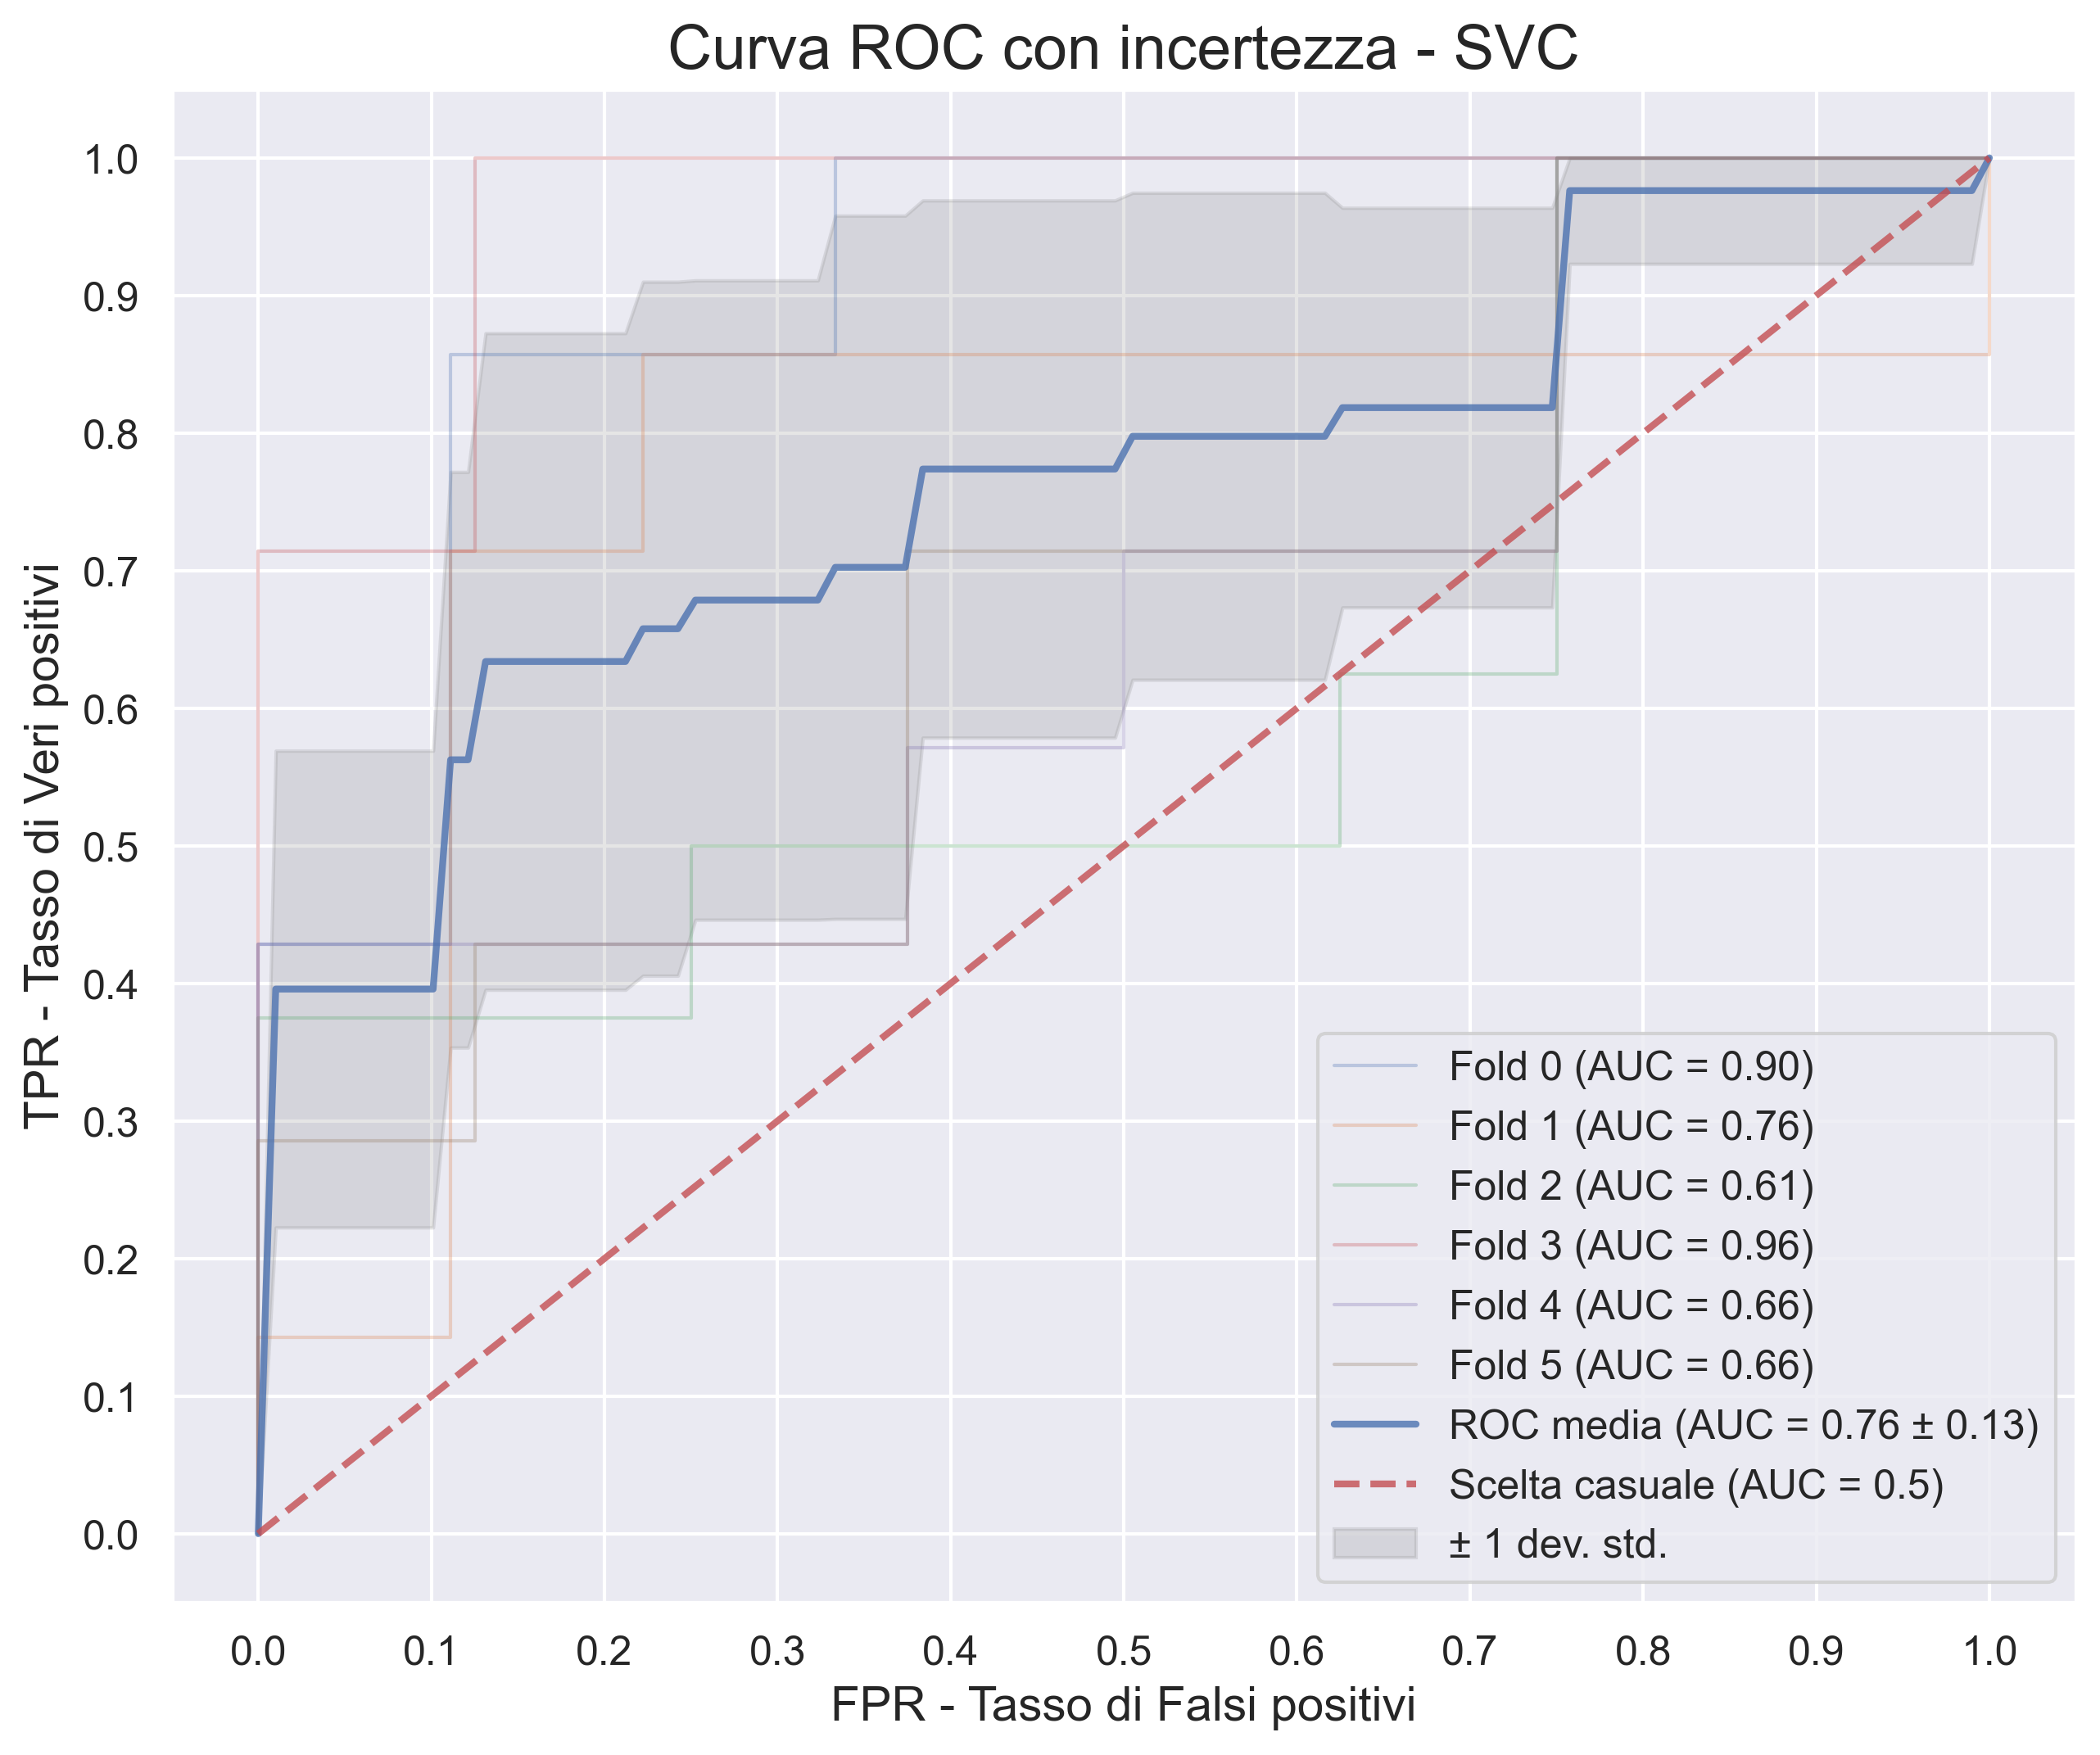

In [ ]:
# Mostra la curva ROC per il modello SVC
plot_roc_cross_val(best_model_svc, X_train, y_train, model_name='SVC')

### Regressione logistica (LR)
La regressione logistica è un algoritmo di *supervised ML* utilizzato per risolvere problemi di classificazione binaria. Stima la probabilità che un'osservazione appartenga a una determinata classe (0 o 1) utilizzando una funzione logistica (sigmoidale). Il risultato è un valore compreso tra 0 e 1, che può essere interpretato come una probabilità di appartenenza a una classe.

In [ ]:
# Definire il modello
model_lr = LogisticRegression(random_state=42)

# Definire la griglia di parametri
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100], # È il parametro di regolarizzazione inversa, che controlla la forza della regolarizzazione: valori più piccoli indicano una regolarizzazione più forte (penalizza più gli errori), mentre valori più grandi riducono la regolarizzazione.
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], # Specifica il tipo di penalizzazione da applicare al modello, rispettivamente: lasso (riduce i coefficienti meno importanti a zero), ridge (tende a ridurre la grandezza dei coefficienti, ma non li annulla), combinazione dei primi due oppure nessuna penalizzazione.
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], # Metodo usato per ottimizzare la funzione di costo.
    'max_iter': [100, 200, 500] # Numero massimo di iterazioni per l'algoritmo di ottimizzazione. Indica quante volte l'algoritmo tenta di trovare la soluzione ottimale prima di fermarsi.
}

# Eseguire la ricerca a griglia e addestrare il modello
best_model_lr = perform_grid_search(model_lr, param_grid_lr, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Migliori parametri trovati dalla GridSearchCV:
{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

         0.0       0.66      0.86      0.75        22
         1.0       0.73      0.44      0.55        18

    accuracy                           0.68        40
   macro avg       0.69      0.65      0.65        40
weighted avg       0.69      0.68      0.66        40

Accuracy score: 0.675


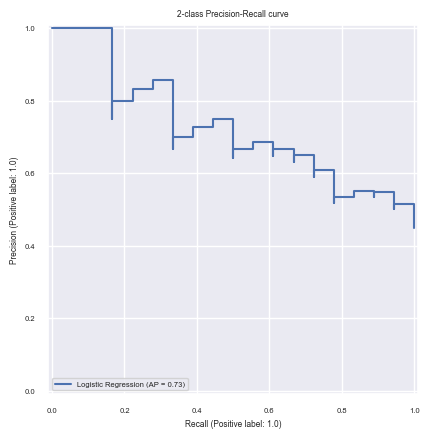

In [ ]:
# Mostra la curva Precision-Recall per Regressione logistica
display = PrecisionRecallDisplay.from_estimator(best_model_lr, X_test, y_test, name="Logistic Regression", plot_chance_level=False)
_ = display.ax_.set_title("2-class Precision-Recall curve")

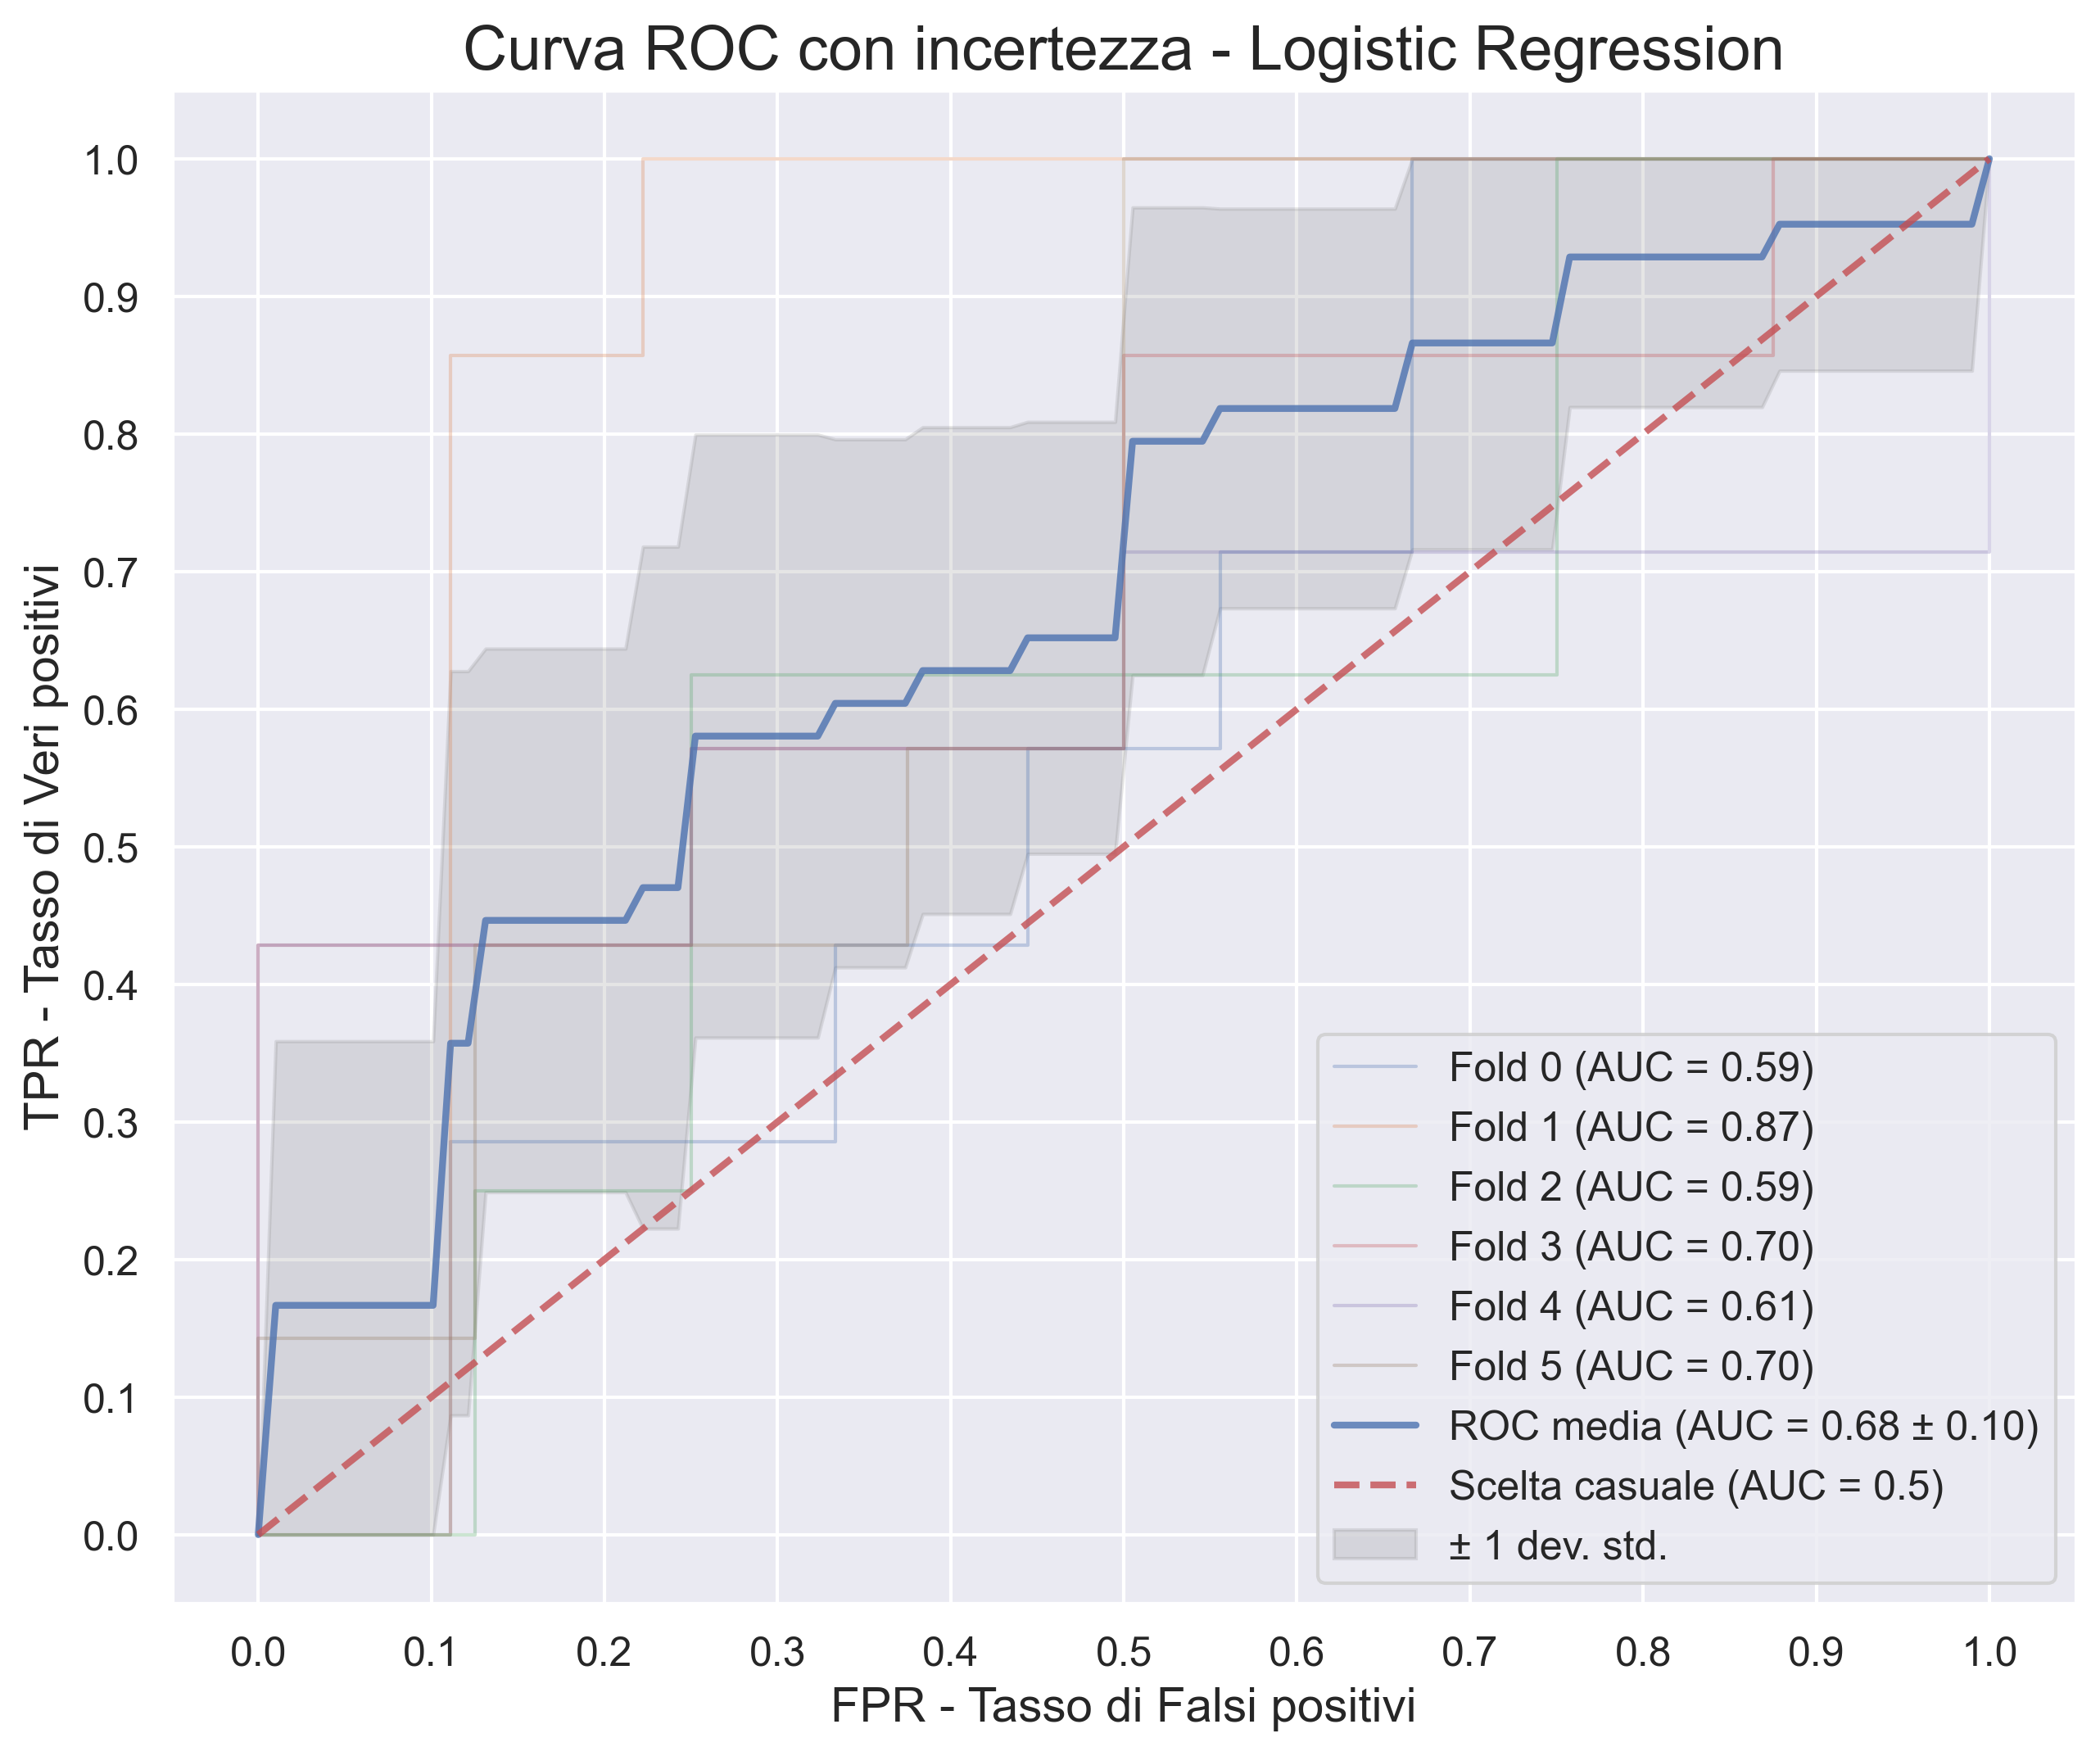

In [ ]:
# Mostra la curva ROC per la regressione logistica
plot_roc_cross_val(best_model_lr, X_train, y_train, model_name='Logistic Regression')

### Random Forest Classifier (RF)
Il classificatore *Random Forest* è un algoritmo di *supervised ML* che utilizza una combinazione di molti alberi decisionali per eseguire la classificazione. Ogni albero viene addestrato su un sottoinsieme casuale dei dati, e il risultato finale è ottenuto attraverso la maggioranza delle predizioni fatte dagli alberi. Questo metodo aiuta a ridurre l'*overfitting* e aumenta la precisione, rendendo *Random Forest* particolarmente efficace per problemi di classificazione complessi.

In [ ]:
# Definire il modello
model_rf = RandomForestClassifier(random_state=42)

# Definire la griglia di parametri
param_grid_rf = {
    'n_estimators': [50, 100, 200], # Numero di alberi nella foresta. Controlla quanti alberi di decisione verranno creati. Valori più alti possono migliorare la performance, ma aumentano il tempo di calcolo.
    'max_depth': [2, 5, 10, None], #Profondità massima degli alberi. Limita quanto profondamente ogni albero può crescere. Valori più bassi riducono l'overfitting, mentre un valore di None permette agli alberi di crescere fino a quando tutte le foglie sono pure.
    'min_samples_split': [2, 5, 10], # Numero minimo di campioni richiesti per dividere un nodo. Controlla quanto "puri" devono essere i nodi per poter essere suddivisi ulteriormente. Valori più alti prevengono la creazione di nodi troppo piccoli.
    'min_samples_leaf': [1, 2, 4], # Numero minimo di campioni necessari per costituire una foglia (nodo terminale). Valori più alti tendono a rendere il modello meno complesso e a ridurre l'overfitting.
    'bootstrap': [True, False] # Se True, il modello utilizza il metodo bootstrap, campionando con rimpiazzo per costruire ciascun albero. Se False, tutti i campioni vengono usati per addestrare ciascun albero (senza campionamento).
}

# Eseguire la ricerca a griglia e addestrare il modello
best_model_rf = perform_grid_search(model_rf, param_grid_rf, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Migliori parametri trovati dalla GridSearchCV:
{'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

         0.0       0.74      0.91      0.82        22
         1.0       0.85      0.61      0.71        18

    accuracy                           0.78        40
   macro avg       0.79      0.76      0.76        40
weighted avg       0.79      0.78      0.77        40

Accuracy score: 0.775


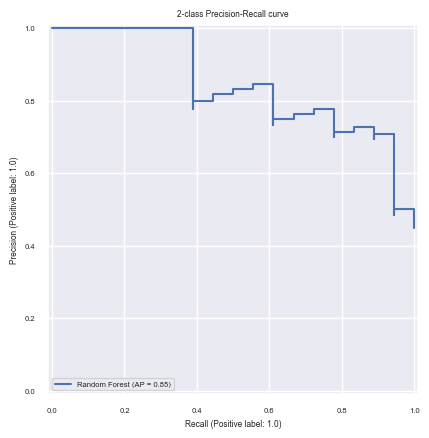

In [ ]:
# Mostra la curva Precision-Recall per Random Forest
display = PrecisionRecallDisplay.from_estimator(best_model_rf, X_test, y_test, name="Random Forest", plot_chance_level=False)
_ = display.ax_.set_title("2-class Precision-Recall curve")

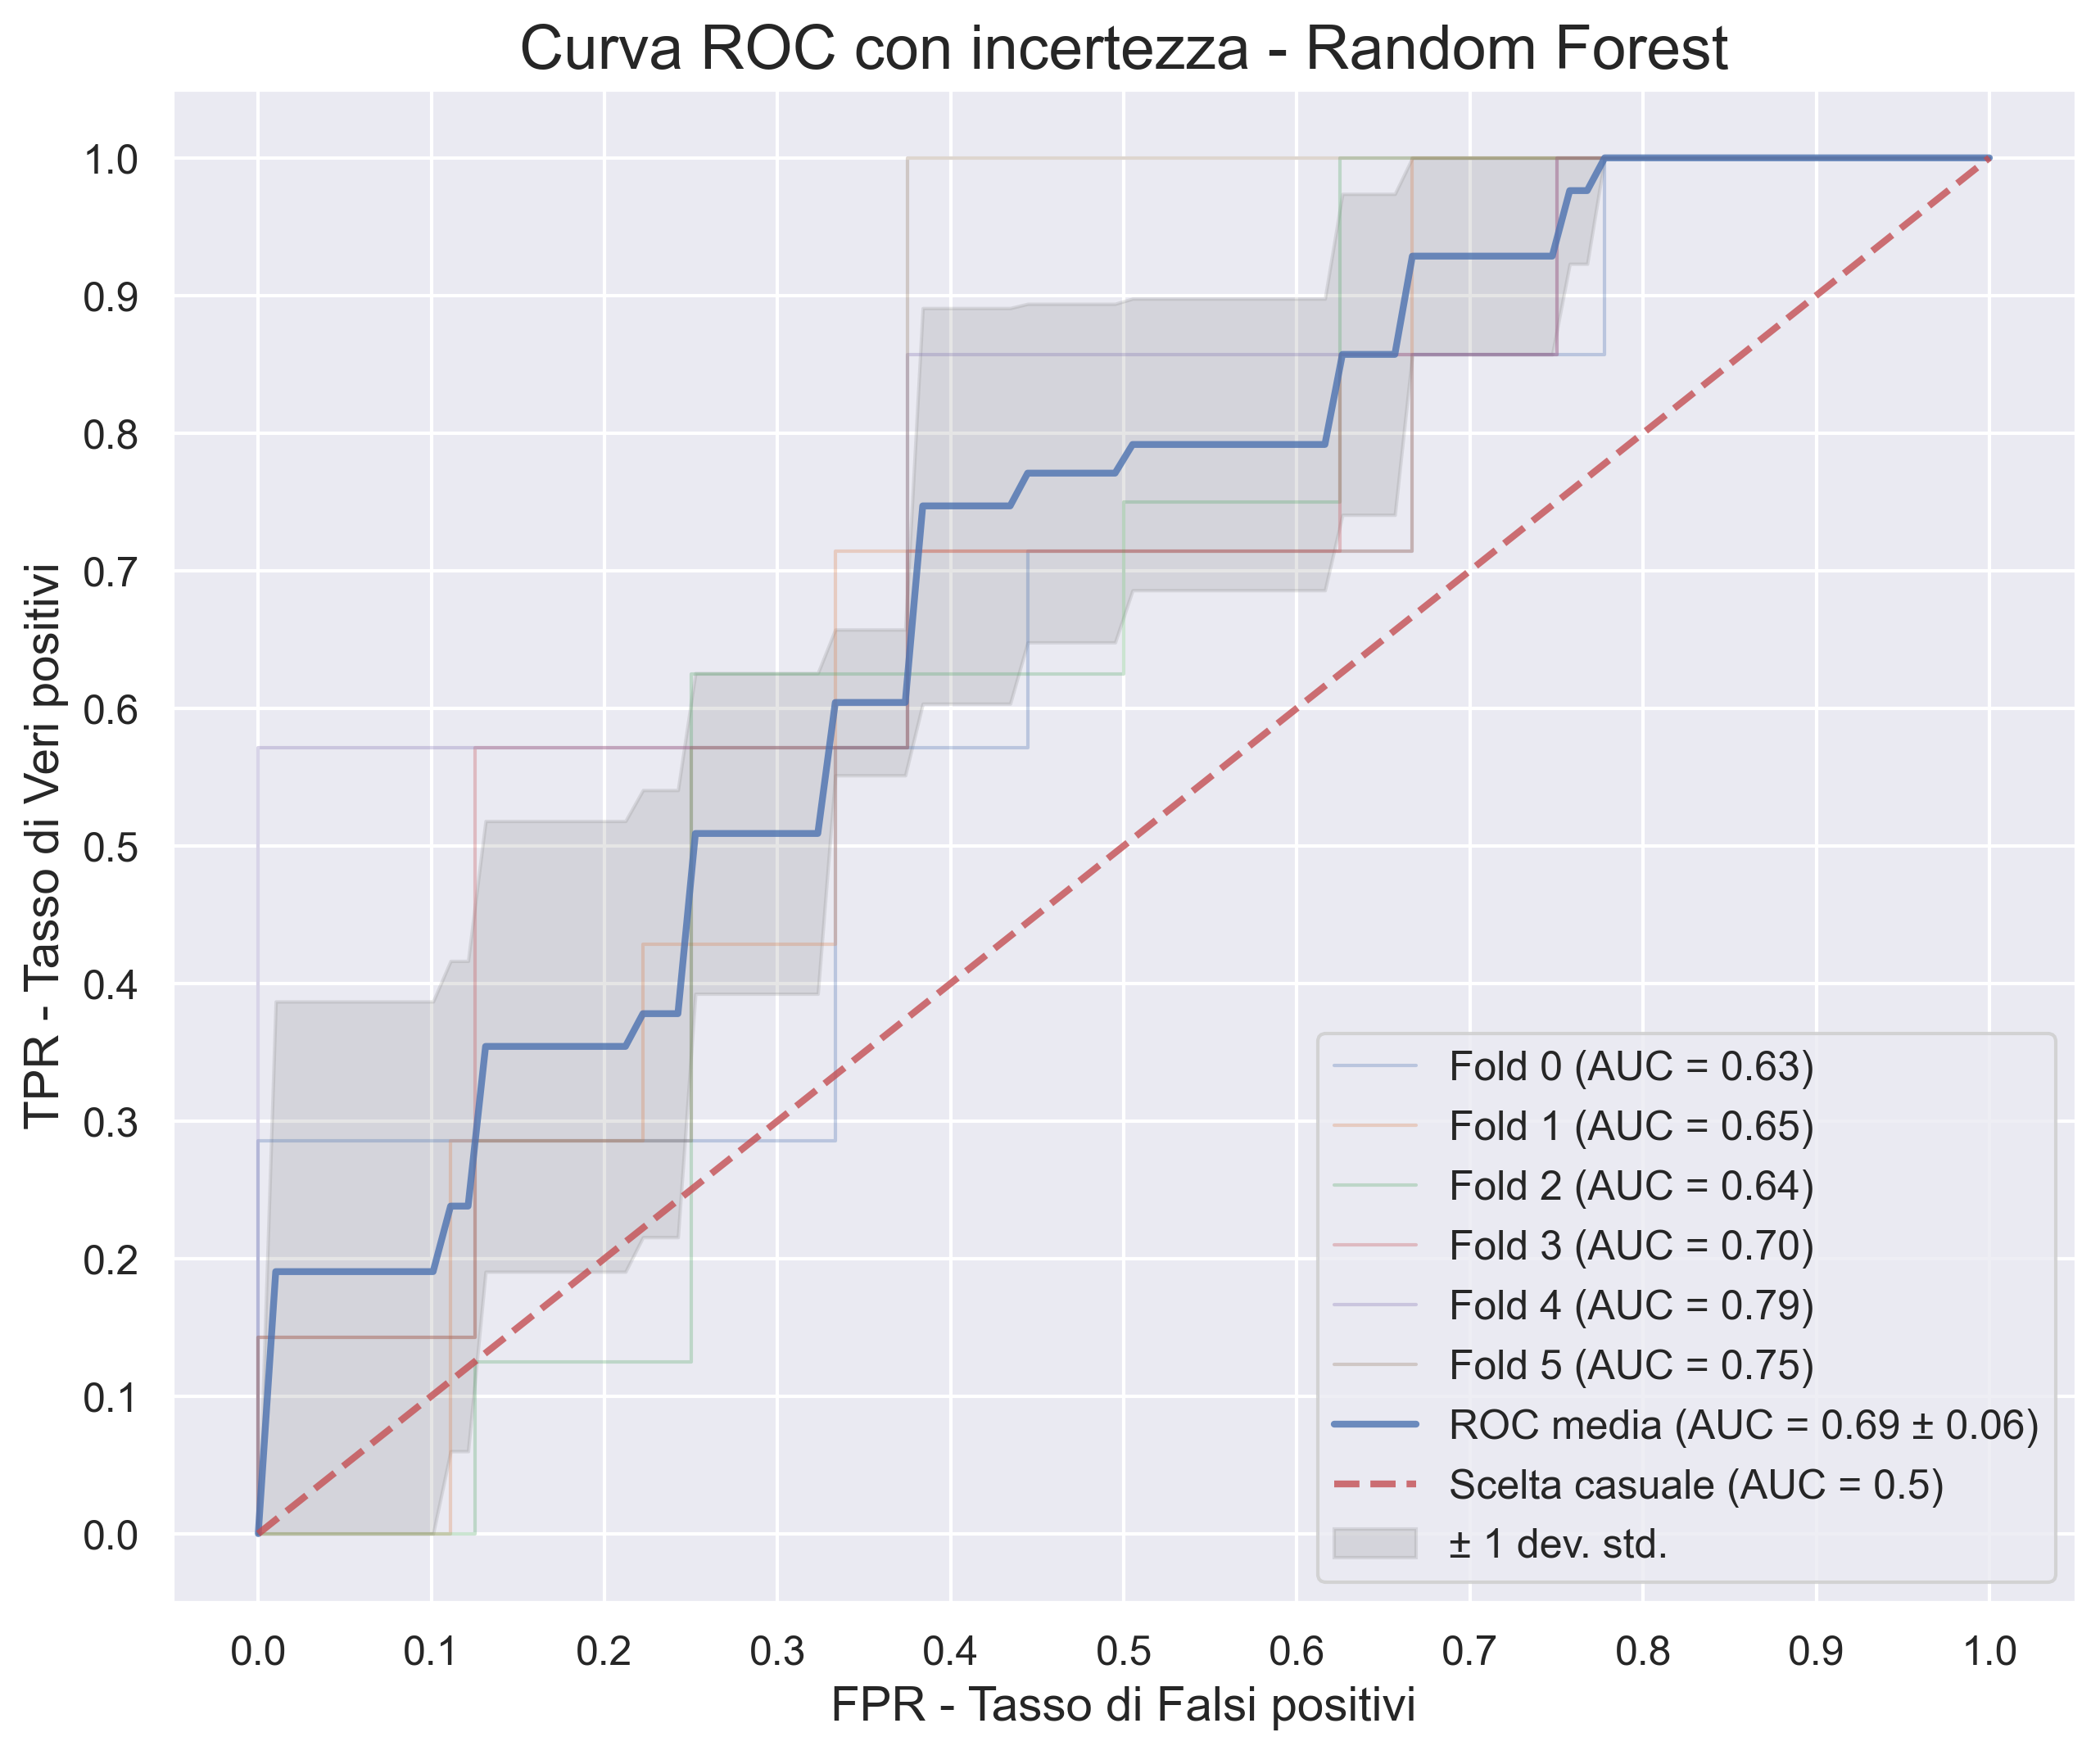

In [ ]:
# Mostra la curva ROC per Random Forest
plot_roc_cross_val(best_model_rf, X_train, y_train, model_name='Random Forest')

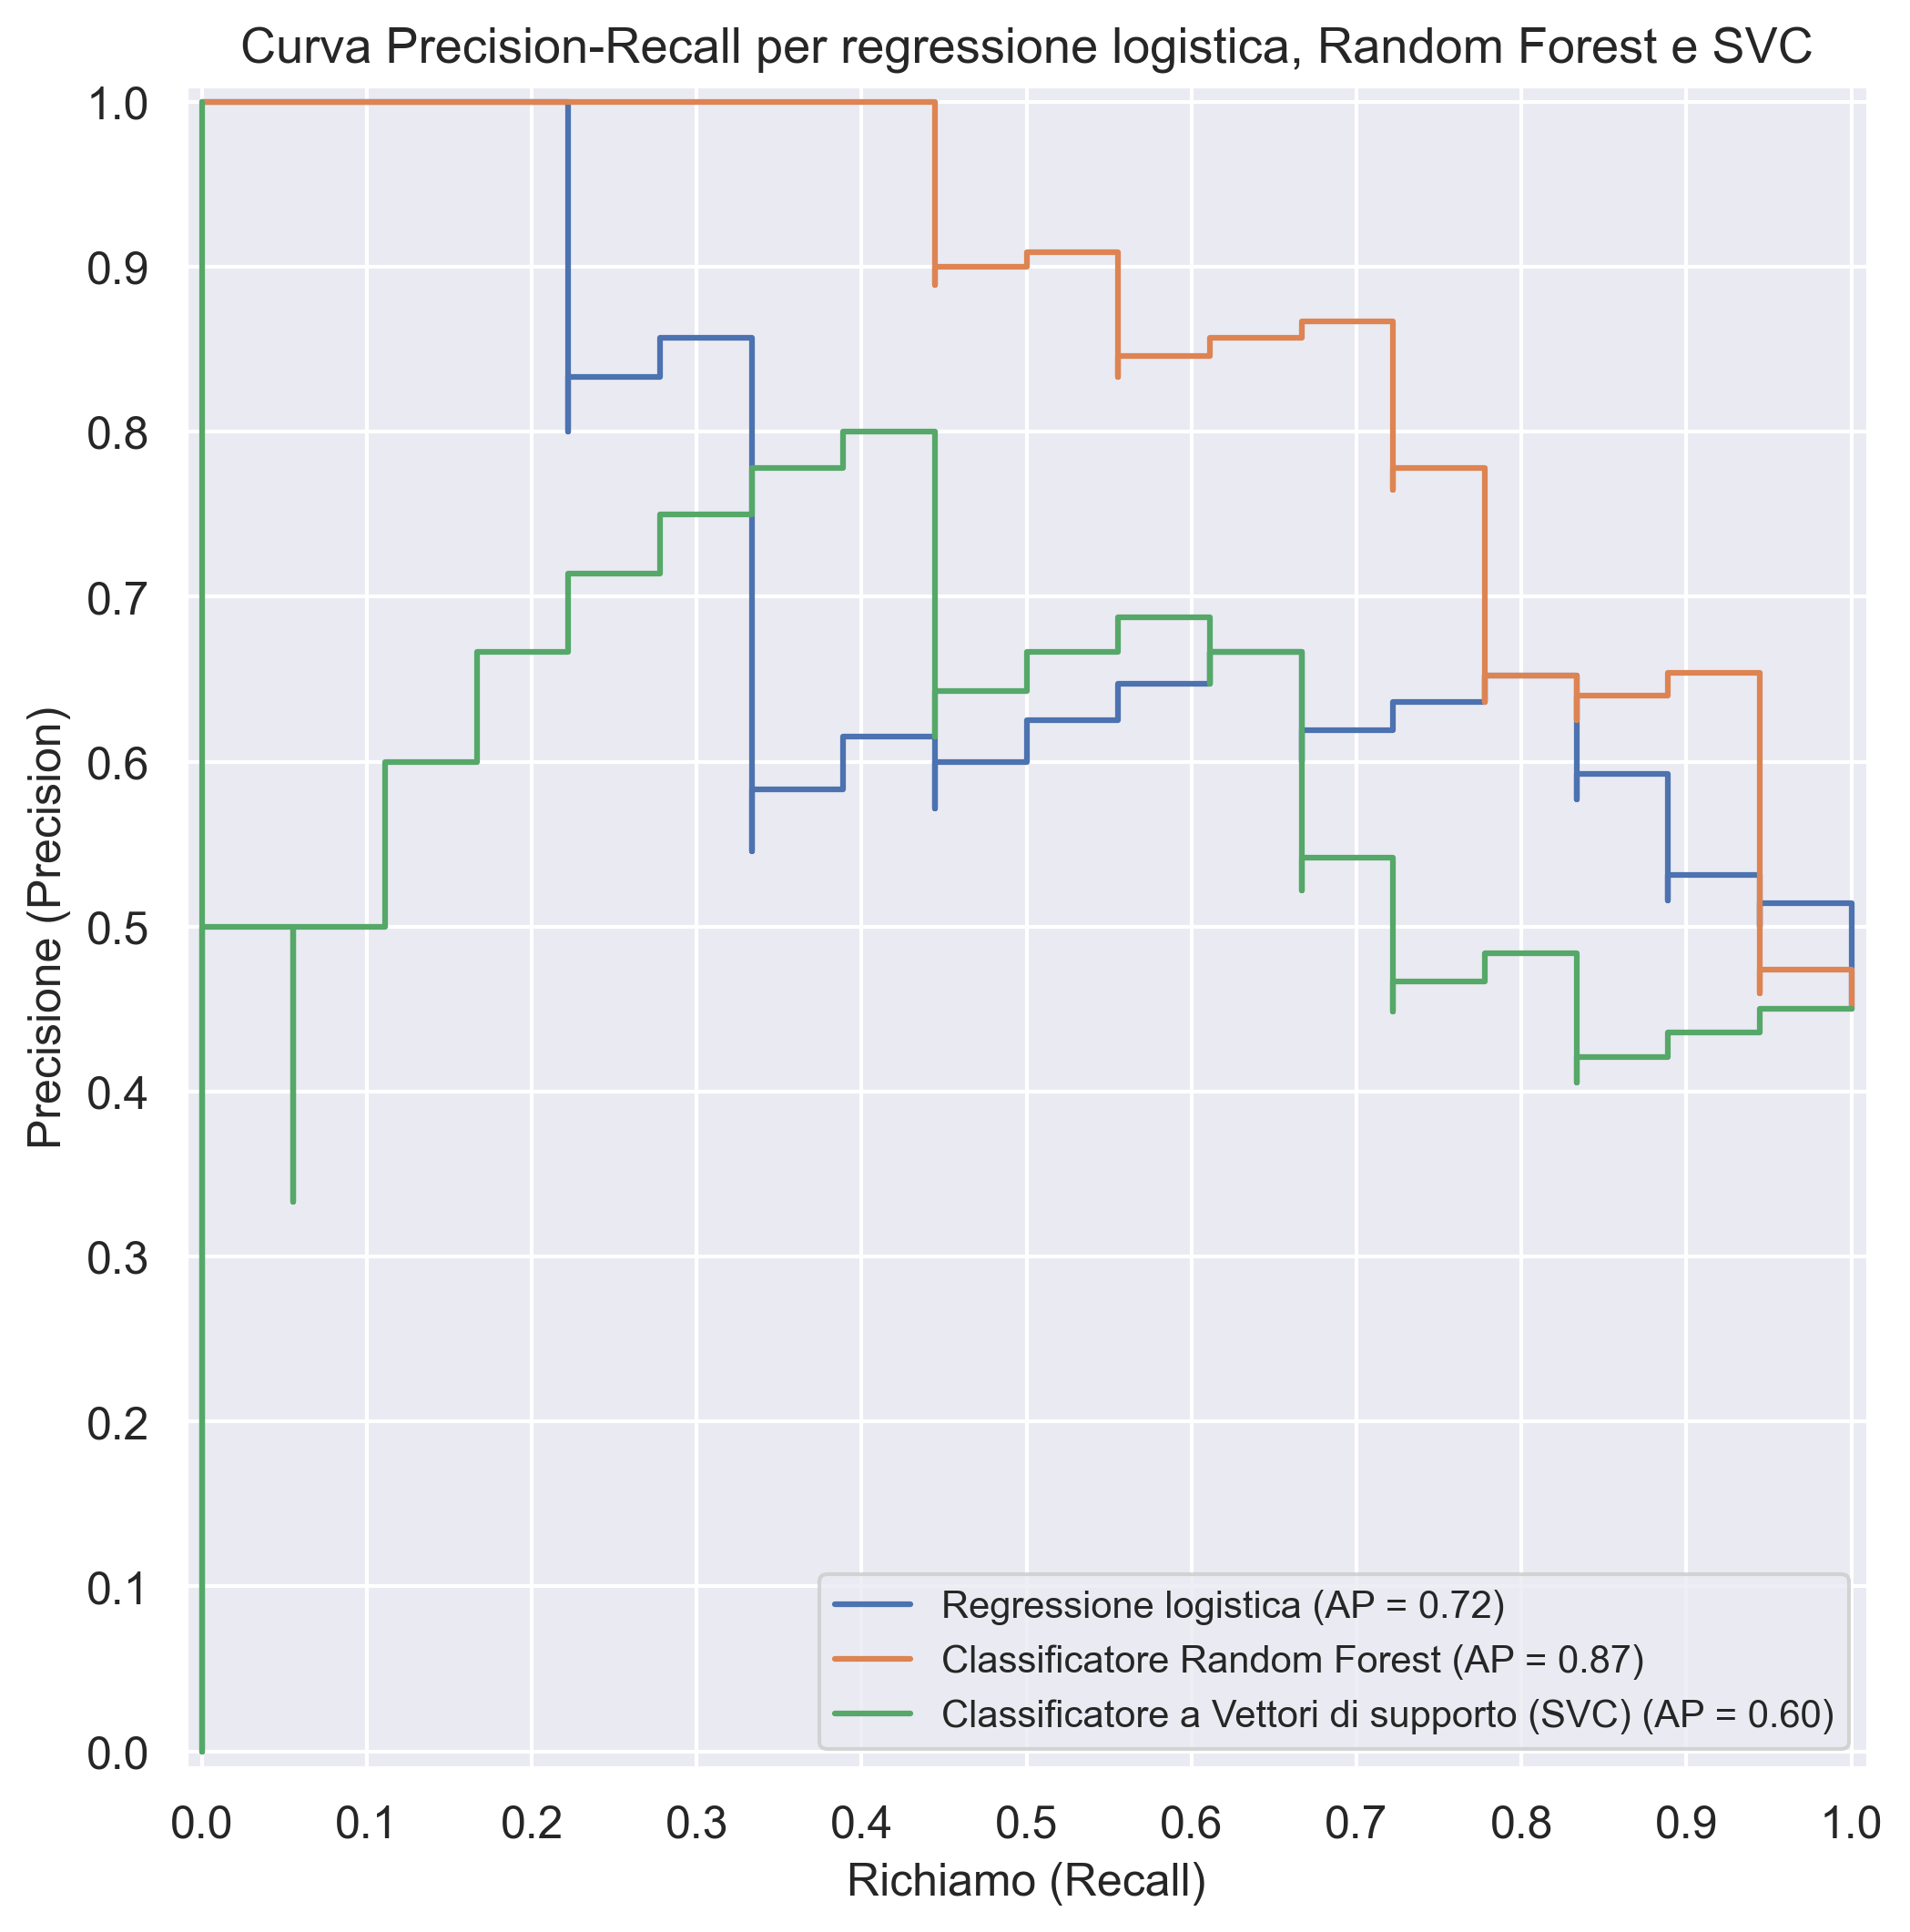

In [ ]:
# Crea le curve Precision-Recall per tutti e tre i modelli contemporaneamente.
# Creare la figura e ottenere l'asse corrente
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

# Logistic Regression
display_logreg = PrecisionRecallDisplay.from_estimator(
    best_model_lr, X_test, y_test, name="Regressione logistica", plot_chance_level=False, ax=ax
)
# Random Forest
display_rf_best = PrecisionRecallDisplay.from_estimator(
    best_model_rf, X_test, y_test, name="Classificatore Random Forest", plot_chance_level=False, ax=ax
)
# Support Vector Machine (SVC)
display_svc = PrecisionRecallDisplay.from_estimator(
    best_model_svc, X_test, y_test, name="Classificatore a Vettori di supporto (SVC)", plot_chance_level=False, ax=ax
)

# Ingrandire il titolo, le etichette degli assi e la legenda
ax.set_title("Curva Precision-Recall per regressione logistica, Random Forest e SVC", fontsize=13)
ax.set_xlabel("Richiamo (Recall)", fontsize=12)
ax.set_ylabel("Precisione (Precision)", fontsize=12)
ax.legend(loc="lower right", fontsize=10)

# Ingrandire i ticks degli assi
ax.tick_params(axis='both', which='major', labelsize=12)
# Impostare i ticks ogni 0.1 sull'asse X e Y
ax.set_xticks(np.arange(0, 1.1, 0.1))  # Ticks da 0 a 1 con intervallo di 0.1
ax.set_yticks(np.arange(0, 1.1, 0.1))  # Ticks da 0 a 1 con intervallo di 0.1

plt.show()

### Conclusioni
Eseguiamo un confronto dei modelli per quanto riguarda i grafici ottenuti e notiamo che:
- Per le curve ROC, il modello SVC ha l'AUC medio più alto (0.76), suggerendo che performa meglio nel distinguere tra classi positive e negative, seguito da *Random Forest* e Regressione logistica.
- Per le curve *Precision-Recall*, il modello *Random Forest* supera sia Regressione logistica che SVC con l'AP più alto (0.85), suggerendo che è più adatto per applicazioni in cui è importante minimizzare i falsi positivi.
- Per la stabilità generale, il modello *Random Forest* dimostra anche maggiore stabilità tra i *fold* (come indicato dalla minore variabilità), rendendolo una scelta più affidabile in scenari reali con set di dati differenti.

In sintesi:
- *Random Forest* offre un miglior equilibrio complessivo, con alta precisione e *recall* e prestazioni stabili in validazione incrociata.
- SVC ha l'AUC ROC più alto ma è meno stabile e più incline ai falsi positivi a livelli di *recall* più alti.
- Regressione logistica ha prestazioni moderate e più variabilità, specialmente nel *recall* quando la precisione cala significativamente.